# **배달의민족 맛집랭킹 진입 업체 매출액 예측**

          - 배달의민족 앱 이용행태 데이터를 기반으로 업체별 매출액 선형회귀 분석 -
          
                                             by. 우아한 남매들 (김재욱, 박경원)

## 목차
1. 프로젝트 진행 목적
2. 데이터 소개
3. 데이터 전처리
4. 탐색적 데이터 분석 (EDA)
5. 선형회귀 예측 결과
6. 개선점

## 프로젝트 진행 목적

### 주제 선정 배경

**" 배달 전문 업체는 한 달에 얼마나 벌까? "**
> "언택트 시대"의 도래로 각광을 받고 있는 <*배달 서비스 창업*>에 대한 관심

**" 성공한 배달 업체의 매출액을 <배달의민족> 데이터로 예측해보자 "**

> 국내 1위 소비자-외식배달업체 연결 플랫폼인 "배달의민족" 어플 내\
상위 랭킹 업체의 데이터를 기반으로\
<*외식배달전문업체의 월간 매출액 예측*>이 가능할 것으로 판단


### 예측 결과 활용 목적

**" 돈 많이 버는 업체의 성공 비결이 뭘까? "**
> '배달의민족' 어플에서 얻을 수 있는 데이터를 중심으로,\
<*매출액이 높은 외식배달전문업체가 되기 위한 조건*> 탐구

**" 만약 이렇게 운영한다면, 본전은 뽑을 수 있을까? "**  
> 임의의 자본금으로 외식배달전문업체를 창업해\
'배달의민족'에 입점한 상황을 가정하고,\
매출액 예측을 위해 필요한 조건 데이터를 임의로 대입한 경우,\
<*손익분기점을 넘기는 매출액을 얻을 수 있을지*> 확인


## 데이터 소개

### 데이터 수집방법

**"모바일앱 크롤링 못하는 자, 구석기 시대로 돌아가라"**
> 업체별 데이터 모두 수작업으로 수집

>
> 1) "배달의민족" 모바일앱 접속\
> 2) 기준지 전철역을 주소지로 등록\
> 3) 맛집랭킹 메뉴의 한식 탭 소속 업체 데이터 확인\
> 4) PC 엑셀에 확인한 데이터 직접 타이핑

>
> - 수집 기간 : 8월 5일(수) ~ 8월 11일(화)
> - 소요 시간 : 데이터 20개 당 약 30분 소요

### 데이터 구성

#### 데이터 출처
>
> "배달의민족" 앱에서\
서울의 전철역을 거주지로 등록할 경우 검색되는 <맛집랭킹 진입 업체 중>\
<한식 카테고리로 분류되는 업체>의 개별 페이지에 공개되어 있는 다양한 데이터
![baemin_screenshot](https://media.discordapp.net/attachments/746440481629536321/749290421372452924/IMG_6643.JPG?width=1468&height=936)

>
> ` 맛집랭킹 업체 수 : 카테고리별 top 20곳 `
>



>
> **- 맛집랭킹 선정 기준 -**
> 
> - 최근주문수, 재주문율, 이용자리뷰 등 여러기준 반영 ("배달의민족"피셜)
> 
![baemin_answer](https://media.discordapp.net/attachments/746440481629536321/749474414499856454/IMG_6646.JPG?width=936&height=936)

#### 총 수집 업체 수
>
> 503곳 (rows)

#### 각 업체당 수집된 데이터 종류
>
> 17종 (columns)

#### 검색 기준지
>
> 서울특별시 내 29개 역
>
> '청담역', '압구정역', '선릉역', '양재역', '고속버스터미널역', '사당역', '상도역', '신림역',
       '영등포역', '석촌역', '강동역', '가산디지털단지역', '마곡나루역', '고덕역', '성수역', '뚝섬역',
       '군자역', '답십리역', '상봉역', '동묘앞역', '미아사거리역', '노원역', '광나루역', '충무로역',
       '숙대입구역', '홍대입구역', '증산역', '한남역', '연신내역'
       
> ![location](https://media.discordapp.net/attachments/746440481629536321/749655294480613396/2020-08-31_12.41.26.png?width=1384&height=936)
       
#### 데이터 종류별 내용
>
> 업체명 (name) , 찜수 (like), 리뷰수 (review), 사장 댓글수 (reply)\
> 최소주문가능금액 (min_del_price), 메뉴설명글, 가게설명글, 사장님공지글의 줄 수 (menu, info, rev_int)\
> 대표메뉴 1, 2, 3 가격 (menu1, 2, 3), 최근주문수 (order), 주소 (addr), 별점 (rate)\
> 주당 운영시간 (runtime_wk(분)), 리뷰이벤트 진행 여부 (event), 검색 기준지 (location)


#### 데이터 구성의 한계
**"왜 한식 업체만 수집했냐구요?**

> 시간과 멘탈이 허락했다면 전철역 기준이 아닌 서울시 전역을 기준으로,\
> 맛집랭킹 진입 업체 뿐만이 아닌, 한식 카테고리 소속 뿐만이 아닌,\
> 전체 업체의 데이터를 수집했겠지만..

> 메뉴설명글, 가게설명글, 사장님공지글의 내용도 그대로 수집하여\
> 감성분석을 해볼 수 있었더라면 좋았겠지만...

> **기술적 한계 & 시간의 제약으로 수집이 불가능하였기 때문에**

> 단일 카테고리 안에서도 <*비교적 다양한 외식업종이 분포되어 있는*>\
한식 업체 데이터를 수집했습니다

> ~즉, 우아한남매가 구석기시대 종족이기 때문에...~

## 데이터 전처리

> **1. target column 생성**
> - 단순 매출액 (sales_s)\
   = 최소주문금액 * 최근주문수
>
>
> - 가중치 매출액 (sales_w)\
   = {(최소주문금액\*0.3)+(대표메뉴1\*0.3)+(대표메뉴2\*0.2)+(대표메뉴3\*0.2)} * 최근주문수

> **2. feature column 추가**
>
> <프랜차이즈 업체 여부>를 나타내는 이진데이터
>
> - 업체명에 "점"이 들어가거나, 타 지역에 위치함에도 업체명이 동일한 경우\
>   => 프랜차이즈 업체로 간주하여 "fran" 컬럼에 1을 추가
>
>
> - 위의 조건에 맞지 않는 경우\
>   => 비프랜차이즈 업체로 간주하여 "fran" 컬럼에 0을 추가

> **3. text data column의 카테고리 임베딩**
>
> - 텍스트 데이터로 구성된 주소(gu/dong), 인근 전철역명(location) 컬럼의 이진화
>

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
# 원본데이터 불러오기

bm_df = pd.read_csv("bm_data_2.csv", index_col = 0)

### target column 생성

#### 단순 매출액 (sales_s) 컬럼 추가

In [3]:
bm_df["sales_s"] = bm_df["min_del_price"]*bm_df["order"]
bm_df.tail(2)

name  like  review  reply  min_del_price  menu_int  menu1  \
501  우리동네오면&떡볶이&냉면  1364     808    811           7000        12   7500   
502   1인용 이태원 부대찌개   533     419    443           3000         4  14500   

     menu2  menu3  mean_price  info_int  runtime_wk(분)  order            addr  \
501   7500   9000        8000        29           5880   4000  은평구 갈현동 507-33   
502  15500  16500       15500        18           6440   3000   은평구 불광동 367-2   

     rev_int  total_int  rate  event location   sales_s  
501       38         79   4.9      1     연신내역  28000000  
502       42         64   4.8      1     연신내역   9000000

#### 가중치 매출액 (sales_w) 컬럼 추가

In [4]:
bm_df["sales_w"] = ((bm_df["min_del_price"]*0.3)+(bm_df["menu1"]*0.3)+(bm_df["menu2"]*0.2)+\
                   (bm_df["menu3"]*0.2))*(bm_df["order"])
bm_df.tail(2)

name  like  review  reply  min_del_price  menu_int  menu1  \
501  우리동네오면&떡볶이&냉면  1364     808    811           7000        12   7500   
502   1인용 이태원 부대찌개   533     419    443           3000         4  14500   

     menu2  menu3  mean_price  ...  runtime_wk(분)  order            addr  \
501   7500   9000        8000  ...           5880   4000  은평구 갈현동 507-33   
502  15500  16500       15500  ...           6440   3000   은평구 불광동 367-2   

    rev_int  total_int  rate  event  location   sales_s     sales_w  
501      38         79   4.9      1      연신내역  28000000  30600000.0  
502      42         64   4.8      1      연신내역   9000000  34950000.0  

[2 rows x 21 columns]

In [5]:
# 결측치 확인
bm_df.isnull().sum()

name             0
like             0
review           0
reply            0
min_del_price    0
menu_int         0
menu1            0
menu2            0
menu3            0
mean_price       0
info_int         0
runtime_wk(분)    0
order            0
addr             0
rev_int          0
total_int        0
rate             0
event            0
location         0
sales_s          0
sales_w          0
dtype: int64

### feature column (프랜차이즈) 추가

- 프랜차이즈 업체 여부 이진데이터 컬럼 생성

In [6]:
# 1. 프렌차이즈 업체 확인
bm_df.loc[bm_df["name"]=="솔로테이블"]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  menu3  \
67   솔로테이블   534     763    764           6000        20   7000  10000   7500   
249  솔로테이블   852     891    899           5000         4   6500   6900   6900   
432  솔로테이블   439     397    397           7000        10   7500   7500   7500   

     mean_price  ...  runtime_wk(분)  order              addr rev_int  \
67         8167  ...           4620   5000       동작구 동작동 333       0   
249        6767  ...           5040   6000  성동구 성수동2가 279-42       4   
432        7500  ...           4620   2000    마포구 서교동 369-10       6   

     total_int  rate  event  location   sales_s     sales_w  
67          28   4.8      1       사당역  30000000  37000000.0  
249         21   4.6      1       성수역  30000000  37260000.0  
432         46   4.8      1     홍대입구역  14000000  14700000.0  

[3 rows x 21 columns]

#### 이름에 "점"을 포함한 업체 추출

In [7]:
bm_df['fran'] = [1 if "점" in x else 0 for x in bm_df['name']]
bm_df["fran"]

0      0
1      1
2      0
3      0
4      0
      ..
498    1
499    0
500    0
501    0
502    0
Name: fran, Length: 503, dtype: int64

#### 이름이 동일한 업체 추출

In [8]:
# 1. 원본 데이터프레임에서 이름 중복업체 추출

count = pd.value_counts(bm_df["name"], sort=True)
count_df = pd.DataFrame(count)
print(count)
count_df.reset_index(inplace=True)
count_df.columns = ["name", "counts"]
count_df["fran"] = count_df["counts"]>=2
count_df["fran"] = [1 if x == True else 0 for x in count_df["fran"]]

후구오네 짜글이                  5
솔로테이블                     3
팔공냉면                      3
엄마밥상                      3
냉면쟁이 고기꾼                  2
                         ..
Since2000 논현동 황금식당 사당점    1
순대싸롱 미아점                  1
동대문소문난 만경식당               1
도도삼겹                      1
배달짜글 oh짜글 상도점             1
Name: name, Length: 486, dtype: int64


In [9]:
# 2. 비프랜차이즈 업체 삭제

for idx, row in count_df.iterrows():
    if count_df.loc[idx, "fran"]==0:
        count_df = count_df.drop(idx)
print(len(count_df))

11


In [10]:
# 3-1. 프랜차이즈 업체 이름 추출

name = count_df["name"].tolist()
len(name)

11

In [11]:
# 3-2. 업체명 중복 & 데이터 중복인 경우 확인 => 없음!

for data in name:
    addr = bm_df["addr"][bm_df["name"]==data]
    print(data,"\n", addr.value_counts())    

후구오네 짜글이 
 서울시 영등포구 당산동2가 125    1
서울시 강동구 천호동 121-93    1
성동구 송정동 73-918        1
중구 신당동 347-326        1
중랑구 상봉동 86-45         1
Name: addr, dtype: int64
솔로테이블 
 마포구 서교동 369-10      1
성동구 성수동2가 279-42    1
동작구 동작동 333         1
Name: addr, dtype: int64
팔공냉면 
 광진구 구의동 239-107       1
서울시 강남구 논현동 148-13    1
서울시 송파구 삼전동 61-12     1
Name: addr, dtype: int64
엄마밥상 
 서울시 강동구 길동 381-1    1
강남구 역삼동 735-17      1
광진구 군자동 350-8       1
Name: addr, dtype: int64
냉면쟁이 고기꾼 
 서울시 관악구 봉천동 14-41    1
서울시 강서구 마곡동 758-4    1
Name: addr, dtype: int64
정성이 가득찬 집밥 
 서울시 서초구 방배동 954-31    1
성북구 길음동 1262-234      1
Name: addr, dtype: int64
1인용 이태원 부대찌개 & 김치찜 
 서울시 강남구 역삼동 700-21    1
강북구 미아동 236-11        1
Name: addr, dtype: int64
10첩반상 찌개백반 
 노원구 상계동 1283     1
중랑구 묵동 250-17    1
Name: addr, dtype: int64
밥꼬콩불 
 은평구 응암동 732-10       1
서울시 강서구 마곡동 774-3    1
Name: addr, dtype: int64
맛없으면 환불해주는 장군집 
 서울시 강남구 역삼동 704-6     1
서울시 서초구 방배동 951-20    1
Name: addr, dtype: int64
고기듬뿍통큰비빔밥 
 용산구 이태원동 225-67    1
광진구 

In [12]:
# 3-2. 원본 데이터프레임에 중복이름 프랜차이즈 업체 추가

for idx, row in bm_df.iterrows():
    if bm_df.loc[idx, "name"] in name:
        bm_df.loc[idx, "fran"] = 1

- 추가된 컬럼 데이터 확인

In [13]:
# 업체명 "점" 포함 프랜차이즈 업체 확인

bm_df.loc[bm_df["name"]=="김밥천국 건대점"]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
235  김밥천국 건대점  3364    1875   1931           6500        19   5000   7500   

     menu3  mean_price  ...  order           addr  rev_int total_int  rate  \
235   7500        6667  ...  16000  광진구 화양동 11-30       40        78   4.9   

     event  location    sales_s      sales_w  fran  
235      1       성수역  104000000  103200000.0     1  

[1 rows x 22 columns]

In [14]:
# 중복 업체명 프랜차이즈 업체 확인

bm_df.loc[bm_df["name"]=="솔로테이블"]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  menu3  \
67   솔로테이블   534     763    764           6000        20   7000  10000   7500   
249  솔로테이블   852     891    899           5000         4   6500   6900   6900   
432  솔로테이블   439     397    397           7000        10   7500   7500   7500   

     mean_price  ...  order              addr  rev_int total_int  rate  event  \
67         8167  ...   5000       동작구 동작동 333        0        28   4.8      1   
249        6767  ...   6000  성동구 성수동2가 279-42        4        21   4.6      1   
432        7500  ...   2000    마포구 서교동 369-10        6        46   4.8      1   

     location   sales_s     sales_w  fran  
67        사당역  30000000  37000000.0     1  
249       성수역  30000000  37260000.0     1  
432     홍대입구역  14000000  14700000.0     1  

[3 rows x 22 columns]

### Text data 카테고리 임베딩

- 주소값 카테고리 임베딩

In [15]:
import re

#### 자치구별 분류

In [16]:
# 구별 분류
gu = pd.Series(re.findall("[가-힣]+구[\s]", str(bm_df["addr"].tolist())))

print(len(gu), len(gu.unique()))

# 광명시 4개 data가 gu에서 빠짐

499 24


In [17]:
# 광명을 구로 분류하여 "gu" column 생성

bm_df["gu"] = range(503)

for idx, addr in enumerate(bm_df['addr']):
    if "광명" in str(addr):
        bm_df["gu"].loc[idx] = "광명시"
        
    else:
        data = re.findall("[가-힣]+구[\s]", str(addr))
        bm_df["gu"].iloc[idx] = ''.join(data).strip()

In [18]:
bm_df.loc[bm_df["gu"] == "광명시"]

name  like  review  reply  min_del_price  menu_int  menu1  \
186      송주불냉면 & 송주막국수   980    1024   1014          10000        17   8500   
191             1984반찬   386     274    274          16000        14  10000   
194  프리미엄 쫄면삼겹 고돼지 광명점   279     265    251           9000         0   8000   
196        하남돼지집 광명철산점   335     259    249          25000        15  15000   

     menu2  menu3  mean_price  ...                 addr  rev_int  total_int  \
186   8500  11500        9500  ...    경기도 광명시 철산동 105-1       18         52   
191   6000   6000        7333  ...  경기도 광명시 철산동 472-107        9         48   
194   9500   8000        8500  ...     경기 광명시 철산동 169-3       15         27   
196  15000  16000       15333  ...      경기도 광명시 철산동 420       19         72   

    rate  event  location   sales_s     sales_w fran   gu  
186  4.8      1  가산디지털단지역  70000000  66850000.0    0  광명시  
191  4.7      1  가산디지털단지역  16000000  10200000.0    0  광명시  
194  4.7      1  가산디지털단지역   9000000   8600000.0    1  광명시  
196  4.6      1  가산디지털단지역  50000000  36400000.0    1  광명시  

[4 rows x 23 columns]

#### 행정동별 분류

In [19]:
# 동별 분류

# [--동] : 446개

# "구"로 끝나는 것 제외
# 동 뒤에 "숫자"나 "가" 붙는 것 제외

dong = pd.Series(re.findall("[가-힣][^(구\s)]+동[^1-9|가]", str(bm_df["addr"].tolist())))

print(len(dong), len(dong.unique()))

pd.value_counts(dong)

446 110


논현동      26
역삼동      19
구의동      16
봉천동      15
화양동      14
         ..
하계동       1
흑석동       1
도선동       1
답심리동      1
용두동       1
Length: 110, dtype: int64

In [20]:
# "가"로 시작하는 동이름도, "구"로 시작하는 동이름도
# 동이름 안에 "숫자"가 포함된 것도 잘 추출됨!

print(dong[dong.str.contains("가락동")], dong[dong.str.contains("구로동")],\
      dong[dong.str.contains("상도1동")], sep = "\n")

124    가락동 
125    가락동 
127    가락동 
133    가락동 
dtype: object
119    구로동 
159    구로동 
167    구로동 
168    구로동 
172    구로동 
173    구로동 
175    구로동 
dtype: object
99    상도1동 
dtype: object


In [21]:
# [-동] : 10개

# 동이름이 한글자인 경우

one_dong = pd.Series(re.findall("\s[가-힣]동[^구|1-9|가]", str(bm_df["addr"].tolist())))

print(len(one_dong), len(one_dong.unique()))

pd.value_counts(one_dong)

10 4


 길동     6
 묵동     2
 중동     1
 창동     1
dtype: int64

In [22]:
# 3-3) 가별 분류

# [-가] : 44개

# "가"로 끝나는 법정동명

ga = pd.Series(re.findall("[가-힣]+\s?[1-9]가", str(bm_df["addr"].tolist())))

print(len(ga),len(ga.unique()))

pd.value_counts(ga)

44 28


성수동2가     6
청파동3가     4
영등포동7가    3
당산동2가     2
당산동1가     2
청파동2가     2
용산동2가     2
영등포동4가    2
명륜4가      2
명륜2가      1
종로6가      1
삼선동3가     1
한강로1가     1
삼선동4가     1
문래동3가     1
삼선동2가     1
명동2가      1
보문동2가     1
한강로2가     1
양평동3가     1
원효로3가     1
필동3가      1
안암동5가     1
동선동2가     1
종로5가      1
원효로2가     1
당산동6가     1
양평동1가     1
dtype: int64

In [23]:
# 전체 addr 개수 : 503개
    # [--동] : 446개
    # [-동] : 10개
    # [--가] : 44개
    
    # regex로 분류가 안된 data 3개가 남는다... 일단 치환 후 보완!

In [24]:
# "dong" column 추가

bm_df["dong"] = range(503)
missing = 0

for idx, addr in enumerate(bm_df['addr']):

    # (--동)만 추출해서 column 추가
    dong = re.findall("[가-힣][^(구\s)]+동[^1-9|가]", str(addr))
    bm_df["dong"].iloc[idx] = ''.join(dong).strip()
  
    # (-동)만 추출해서 column 추가
    if bm_df["dong"].iloc[idx] == "":
        one_dong = re.findall("\s[가-힣]동[^구|1-9|가]", str(addr))
        bm_df["dong"].iloc[idx] = ''.join(one_dong).strip()

        # (--가) => (--동)으로 substitute해서 column추가
        if bm_df["dong"].iloc[idx] == "":
            ga = re.findall("[가-힣]+\s?[1-9]가", str(addr))
            bm_df["dong"].iloc[idx] = ''.join(ga).strip()

            ga2 = bm_df["dong"].iloc[idx]
            bm_df["dong"].iloc[idx] = re.sub("([가-힣]+[^동])(동?\s?[1-9]가)", "\\1동", ga2)

            # regex로 분류 안 된 data는 원본data 추가
            if bm_df["dong"].iloc[idx] == "":
                bm_df["dong"].iloc[idx] = str(addr)
                missing += 1

print(missing, len(bm_df["dong"]))

3 503


In [25]:
# (--가) => 행정동 변환 확인

bm_df.loc[bm_df["dong"]=="명륜동"]

name  like  review  reply  min_del_price  menu_int  menu1  \
318  국밥전문점 육수당 대학로점  1034     426    440          10000        15  10000   
323       명쭈3 대학로본점   665     468    449          14000        13  32500   
324    신우양돈 매운갈비찜&탕   258     203    203          12000        14  12000   

     menu2  menu3  mean_price  ...  rev_int  total_int  rate event  location  \
318   7000   7000        8000  ...       25         55   4.8     1      동묘앞역   
323  32500   2000       22333  ...       22         56   4.9     1      동묘앞역   
324  27000  35000       24667  ...       11         58   4.9     1      동묘앞역   

      sales_s     sales_w  fran   gu  dong  
318  30000000  26400000.0     1  종로구   명륜동  
323  14000000  20850000.0     1  종로구   명륜동  
324  10800000  17640000.0     0  종로구   명륜동  

[3 rows x 24 columns]

In [26]:
# 행정동 이름 오류 수정
bm_df = bm_df.replace({'dong': '명륜동'}, {'dong': '혜화동'})

bm_df.iloc[318]["dong"], bm_df.iloc[323]["dong"], bm_df.iloc[324]["dong"]

('혜화동', '혜화동', '혜화동')

In [27]:
# dong column 결측치(missing) 3개 확인

bm_df.loc[bm_df["dong"]==bm_df["addr"]]

name  like  review  reply  min_del_price  menu_int  menu1  \
53   육전냉면 by.설식당 강남점  1089     714    731           9000        20   9500   
140     냉면쟁이 고기꾼&비빔밥   852    1019   1015           8000        16   8000   
251        인생낙곱새 성수점   731     532    535          13000        23  30000   

     menu2  menu3  mean_price  ...  rev_int  total_int  rate event  location  \
53   20000   9500       13000  ...        8         59   4.8     1       양재역   
140   8000  22000       12667  ...       20         64   4.9     1       석촌역   
251  33500  30000       31167  ...       18         75   4.9     1       성수역   

      sales_s     sales_w  fran   gu               dong  
53   45000000  57250000.0     1  서초구  서울시 서초구 서초동1321-6  
140  24000000  32400000.0     0  송파구   서울시 송파구 오금동18-31  
251  13000000  25600000.0     1  성동구      성동구 성덕정15길 12  

[3 rows x 24 columns]

In [28]:
# dong column 결측치 보완
bm_df = bm_df.replace({'dong': '서울시 서초구 서초동1321-6'}, {'dong': '서초동'})
bm_df = bm_df.replace({'dong': '서울시 송파구 오금동18-31'}, {'dong': '오금동'})
bm_df = bm_df.replace({'dong': '성동구 성덕정15길 12'}, {'dong': '성수동'})

bm_df.iloc[53]["dong"], bm_df.iloc[140]["dong"], bm_df.iloc[251]["dong"]

('서초동', '오금동', '성수동')

In [29]:
# dong column 결측치 부재 확인
len(bm_df.loc[bm_df["dong"]==bm_df["addr"]])

0

In [30]:
# 상도1동 => 상도동으로 합치기
bm_df = bm_df.replace({'dong': '상도1동'}, {'dong': '상도동'})
len(bm_df.loc[bm_df["dong"]=="상도1동"])

0

#### One-hot encoding

In [31]:
dum_df = pd.get_dummies(bm_df.drop(["name", "addr"], axis=1))

print(dum_df.shape)
print("===========원본 features=========", "\n", list(bm_df.columns), "\n")
print("===========더미 features=========", "\n", list(dum_df.columns), "\n")
print("===========feature 개수==========","\n", len(dum_df.columns))

(503, 203)
===========원본 features========= 
 ['name', 'like', 'review', 'reply', 'min_del_price', 'menu_int', 'menu1', 'menu2', 'menu3', 'mean_price', 'info_int', 'runtime_wk(분)', 'order', 'addr', 'rev_int', 'total_int', 'rate', 'event', 'location', 'sales_s', 'sales_w', 'fran', 'gu', 'dong'] 

===========더미 features========= 
 ['like', 'review', 'reply', 'min_del_price', 'menu_int', 'menu1', 'menu2', 'menu3', 'mean_price', 'info_int', 'runtime_wk(분)', 'order', 'rev_int', 'total_int', 'rate', 'event', 'sales_s', 'sales_w', 'fran', 'location_가산디지털단지역', 'location_강동역', 'location_고덕역', 'location_고속버스터미널역', 'location_광나루역', 'location_군자역', 'location_노원역', 'location_답십리역', 'location_동묘앞역', 'location_뚝섬역', 'location_마곡나루역', 'location_미아사거리역', 'location_사당역', 'location_상도역', 'location_상봉역', 'location_석촌역', 'location_선릉역', 'location_성수역', 'location_숙대입구역', 'location_신림역', 'location_압구정역', 'location_양재역', 'location_연신내역', 'location_영등포역', 'location_증산역', 'location_청담역', 'location_충무로역', 'locati

## 탐색적 데이터 분석

### column별 평균 수치

In [32]:
# 평균 데이터 수치 확인

rate_mean = round(np.mean(bm_df["rate"]),2)
like_mean = round(np.mean(bm_df["like"]))
review_mean = round(np.mean(bm_df["review"]))
reply_mean = round(np.mean(bm_df["reply"]))
total_int_mean = round(np.mean(bm_df["total_int"]))
min_del_price_mean = round(np.mean(bm_df["min_del_price"]))
order_mean = round(np.mean(bm_df["order"]))
sales_mean = round(np.mean(bm_df["sales_s"]))
sales_std = round(np.std(bm_df["sales_s"]))
sales_w_mean = round(np.mean(bm_df["sales_w"]))
sales_w_std = round(np.std(bm_df["sales_w"]))

print("===다양한 Feature들의 평균값 ===", "\n", "평균 별점:", rate_mean, "점", "\n", "평균 찜수:", like_mean, "개",\
      "\n", "평균 리뷰수:", review_mean, "건", "\n", "평균 사장댓글수:", reply_mean, "건", "\n", \
      "평균 소개글양:", total_int_mean, "줄", "\n", "평균 최소 주문금액:", min_del_price_mean, "원", "\n",\
      "평균 주문수:", order_mean, "건", "\n", "평균 매출액:", sales_mean, "원", "\n", "매출액 표준편차", sales_std, "원","\n"\
      "w평균 매출액:", sales_w_mean, "원", "\n", "w매출액 표준편차", sales_w_std, "원", "\n", "\n")

# 평균 운영시간 확인

runtime = round(np.mean(bm_df["runtime_wk(분)"]), 2)
runhour = round(runtime/60, 2)
runday = round(runhour/24, 2)
print("===주당 평균 운영 시간===", "\n", "평균 총 운영시간(분): ",  runtime, "\n", "평균 운영시간: ", runhour, "\n", "평균  운영일수: ", runday)

===다양한 Feature들의 평균값 === 
 평균 별점: 4.83 점 
 평균 찜수: 1169 개 
 평균 리뷰수: 756 건 
 평균 사장댓글수: 687 건 
 평균 소개글양: 51 줄 
 평균 최소 주문금액: 9968 원 
 평균 주문수: 4143 건 
 평균 매출액: 38885050 원 
 매출액 표준편차 36358693 원 
w평균 매출액: 48780630 원 
 w매출액 표준편차 45390119 원 
 

===주당 평균 운영 시간=== 
 평균 총 운영시간(분):  5743.17 
 평균 운영시간:  95.72 
 평균  운영일수:  3.99


- 맛집랭킹 진입 업체들의 데이터이기 때문에 평균 값이 대체로 높은 편


- 단순 매출액 (최소주문금액 x 최근주문수)\
   => 월 3800만원 가량
   
   
- 가중 매출액 (최소주문 0.3 + 대표메뉴 0.3 + 2위메뉴 0.2 + 3위메뉴 0.2) x (최근주문수)\
   => 월 1100만원 가량


- 주당 평균 운영시간 5700분 (95시간) 이상
- 주 52시간 근무 직장인보다 2배가량 긴 업무시간


### 모델적용 가능성 확인 (PCA 이용)

In [33]:
from sklearn.preprocessing import StandardScaler

bm_ss = dum_df.drop(["sales_s", "sales_w"], axis=1)
bm_ss = StandardScaler().fit_transform(bm_ss)
bm_ss = pd.DataFrame(bm_ss)
bm_ss = bm_ss.dropna()

In [34]:
from sklearn.decomposition import PCA

def get_pca_data(bm_ss, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(bm_ss)
    
    return pca.transform(bm_ss), pca

In [35]:
from sklearn.preprocessing import StandardScaler

bm_ss = bm_df.drop(["name", "addr", "location", "gu", "dong"], axis=1)
print(len(bm_ss.columns), len(bm_df.columns))
bm_ss = StandardScaler().fit_transform(bm_ss)
bm_ss = pd.DataFrame(bm_ss)
bm_ss = bm_ss.dropna()

from sklearn.decomposition import PCA

def get_pca_data(bm_ss, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(bm_ss)
    
    return pca.transform(bm_ss), pca

def get_pd_from_pca(pca_data, cols=["pca_component_1", "pca_component_2"]):
    return pd.DataFrame(pca_data, columns=cols)

19 24


#### PCA col 2개인 경우

In [36]:
bm_pca, pca = get_pca_data(bm_ss, n_components=2)
bm_pca.shape

(503, 2)

In [37]:
def get_pd_from_pca(pca_data, cols=["pca_component_1", "pca_component_2"]):
    return pd.DataFrame(pca_data, columns=cols)

In [38]:
bm_pd_pca = get_pd_from_pca(bm_pca)
bm_pd_pca["sales_s"] = bm_df["sales_s"]
bm_pd_pca["sales_w"] = bm_df["sales_w"]
bm_pd_pca.head()

pca_component_1  pca_component_2    sales_s      sales_w
0         1.047720         0.776711   40000000   61600000.0
1         9.044992        -4.172564  179400000  204100000.0
2         0.907280        -1.767942   63000000   63000000.0
3         3.677795        -1.395609  132000000  157850000.0
4         2.876514        -1.337977   72000000   80100000.0

In [39]:
bm_pd_pca = get_pd_from_pca(bm_pca)
bm_pd_pca["sales_s"] = bm_df["sales_s"]
bm_pd_pca["sales_w"] = bm_df["sales_w"]
bm_pd_pca.head()

pca_component_1  pca_component_2    sales_s      sales_w
0         1.047720         0.776711   40000000   61600000.0
1         9.044992        -4.172564  179400000  204100000.0
2         0.907280        -1.767942   63000000   63000000.0
3         3.677795        -1.395609  132000000  157850000.0
4         2.876514        -1.337977   72000000   80100000.0

In [40]:
import seaborn as sns
import plotly.express as px

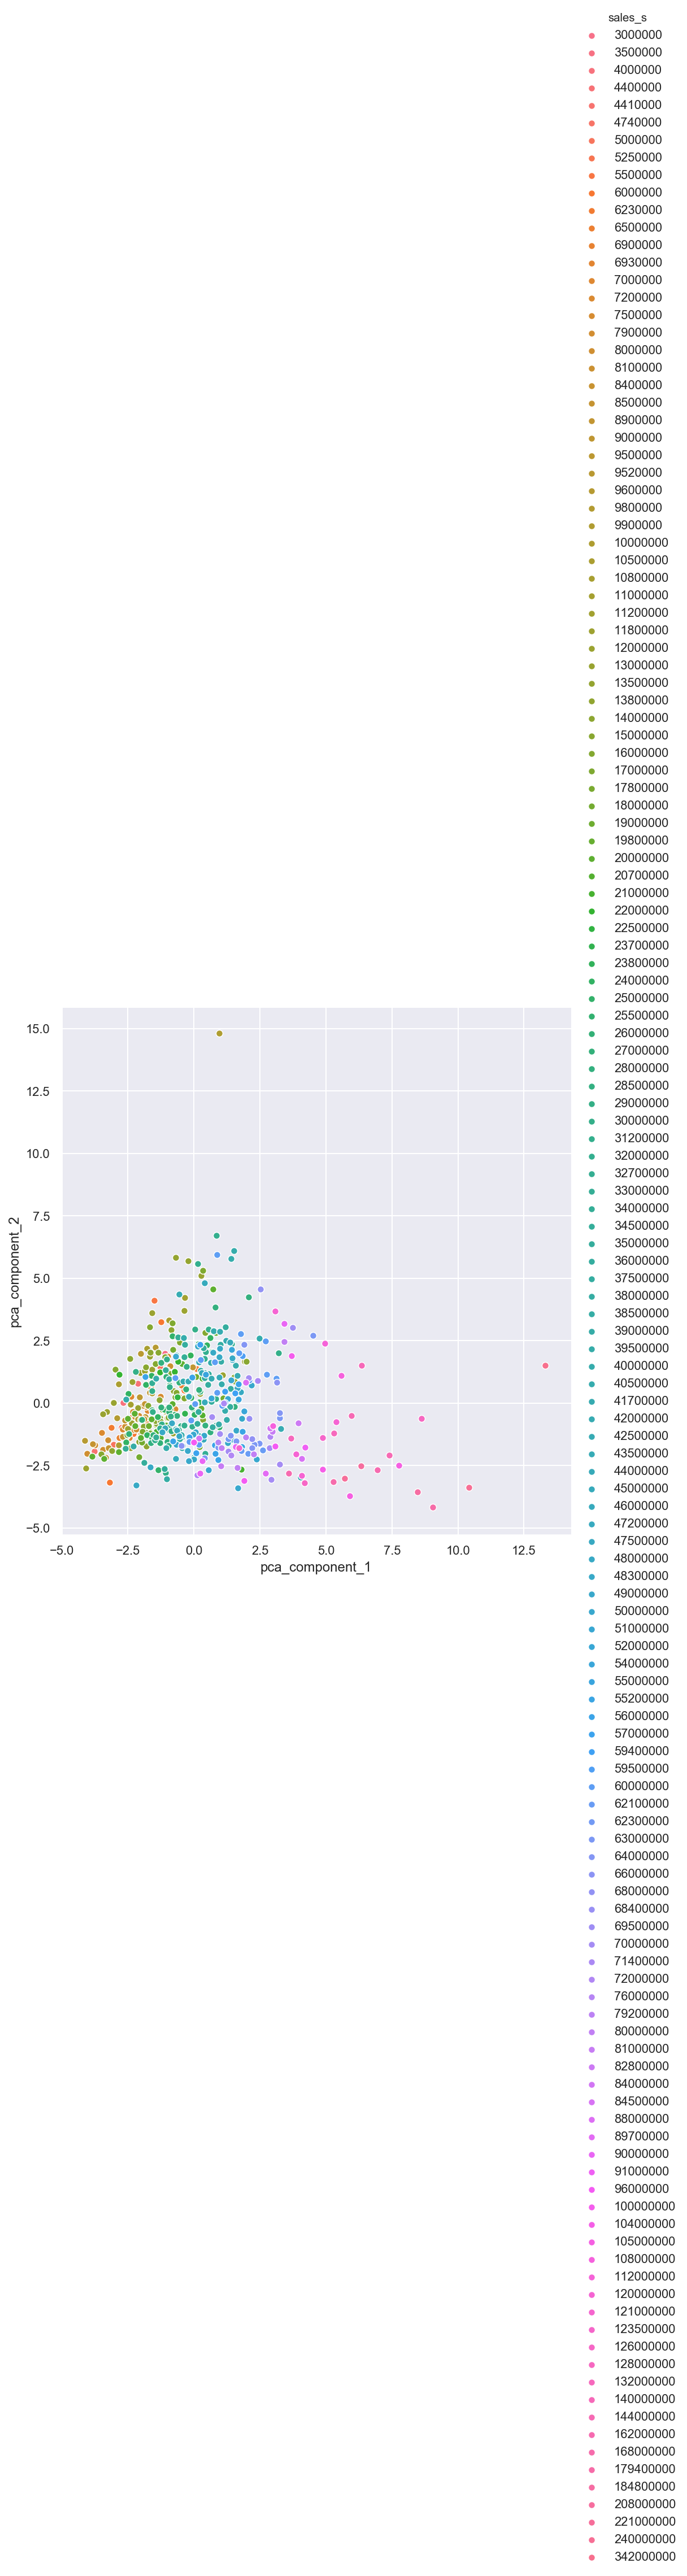

In [41]:
# 단순 매출액 기준
sns.pairplot(bm_pd_pca, hue="sales_s", height=7,
            x_vars=["pca_component_1"], y_vars=["pca_component_2"]);

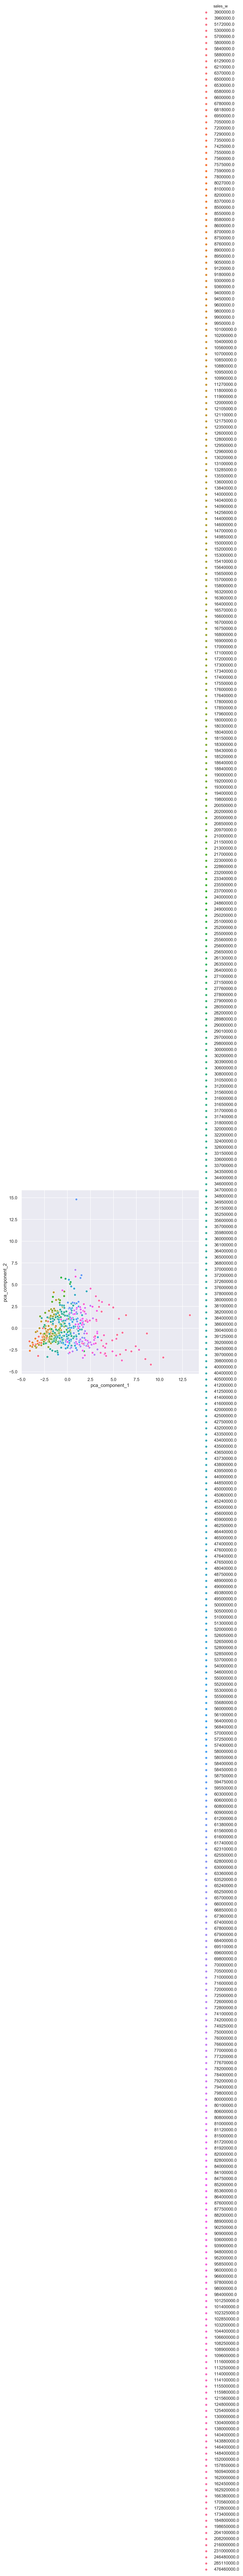

In [42]:
# 가중 매출액 기준
sns.pairplot(bm_pd_pca, hue="sales_w", height=7,
            x_vars=["pca_component_1"], y_vars=["pca_component_2"]);

- pca를 이용해 column을 2개로 줄여본 결과
    - 단순매출(sales_s)이 가중매출(sales_w)보다 덜 혼재되고, 선명하게 나뉘는 것으로 보임

#### PCA col 3개인 경우

In [43]:
# PCA를 3개로
bm_pca_3, pca3 = get_pca_data(bm_ss, n_components=3)
print(bm_pca_3.shape)
bm_pd_pca_3 = get_pd_from_pca(bm_pca_3, cols=["pca_component_1", "pca_component_2", "pca_component_3"] )
bm_pd_pca_3["sales_s"] = bm_df["sales_s"]
bm_pd_pca_3["sales_w"] = bm_df["sales_w"]
bm_pd_pca_3.head()

(503, 3)


pca_component_1  pca_component_2  pca_component_3    sales_s      sales_w
0         1.047723         0.776702         0.975210   40000000   61600000.0
1         9.044991        -4.172562         0.929160  179400000  204100000.0
2         0.907279        -1.767940         0.652425   63000000   63000000.0
3         3.677795        -1.395610         3.983612  132000000  157850000.0
4         2.876514        -1.337976        -1.478487   72000000   80100000.0

In [44]:
# 단순 매출액 기준

fig = px.scatter_3d(bm_pd_pca_3, x="pca_component_1", y= "pca_component_2", z="pca_component_3",\
                   color = "sales_s", symbol="sales_s", opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [45]:
# 가중치 매출액 기준

fig = px.scatter_3d(bm_pd_pca_3, x="pca_component_1", y= "pca_component_2", z="pca_component_3",\
                   color = "sales_w", symbol="sales_w", opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

- pca를 이용해 column을 3개로 줄여본 결과
    - 육안으로는 식별이 잘 안 됨...

#### 결론
- 어쨋건 201개의 feature 중에 모델에 넣는 경우 target을 예측해낼 수 있는 유의미한 값이 존재함을 알 수 있음

### 상관계수 확인

In [46]:
import matplotlib.pyplot as plt
import hangul_font

Hangul font is set!


#### 수치데이터_히트맵
- 자치구, 행정동 등 더미변수 컬럼 없이

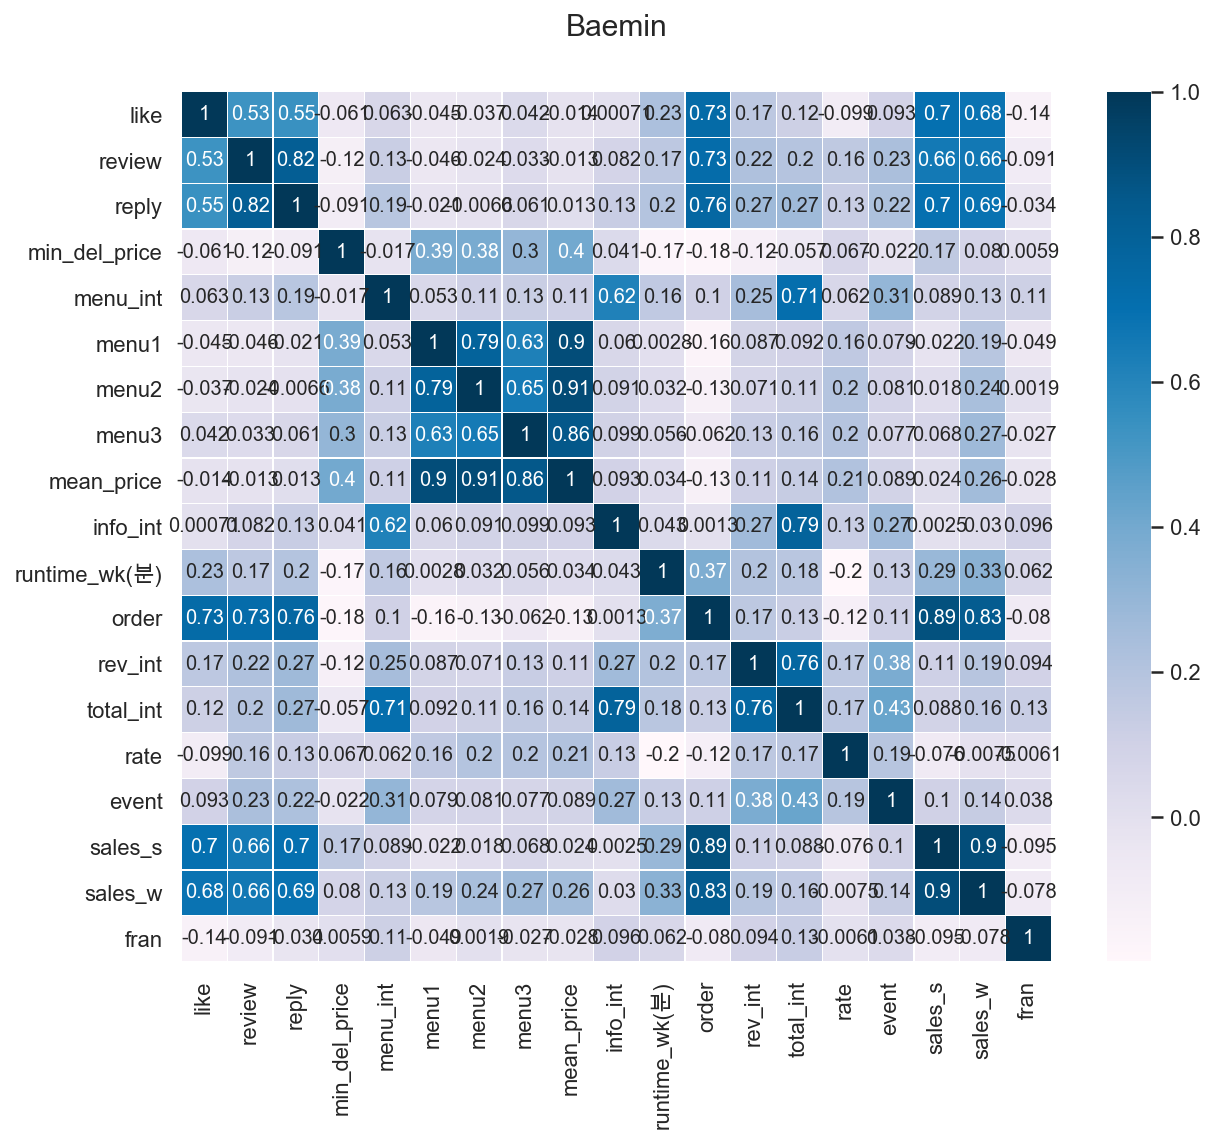

In [47]:
bm_sb = bm_df.drop(["name", "addr", "location", "gu", "dong"], axis=1)
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Baemin", y = 1.05, size = 15)
sns.heatmap(bm_sb.astype(float).corr(),\
            linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap,\
            linecolor = "white", annot = True, annot_kws = {"size" : 10})

#### 더미데이터_히트맵
- 자치구, 행정동 등 더미변수 컬럼 추가하여

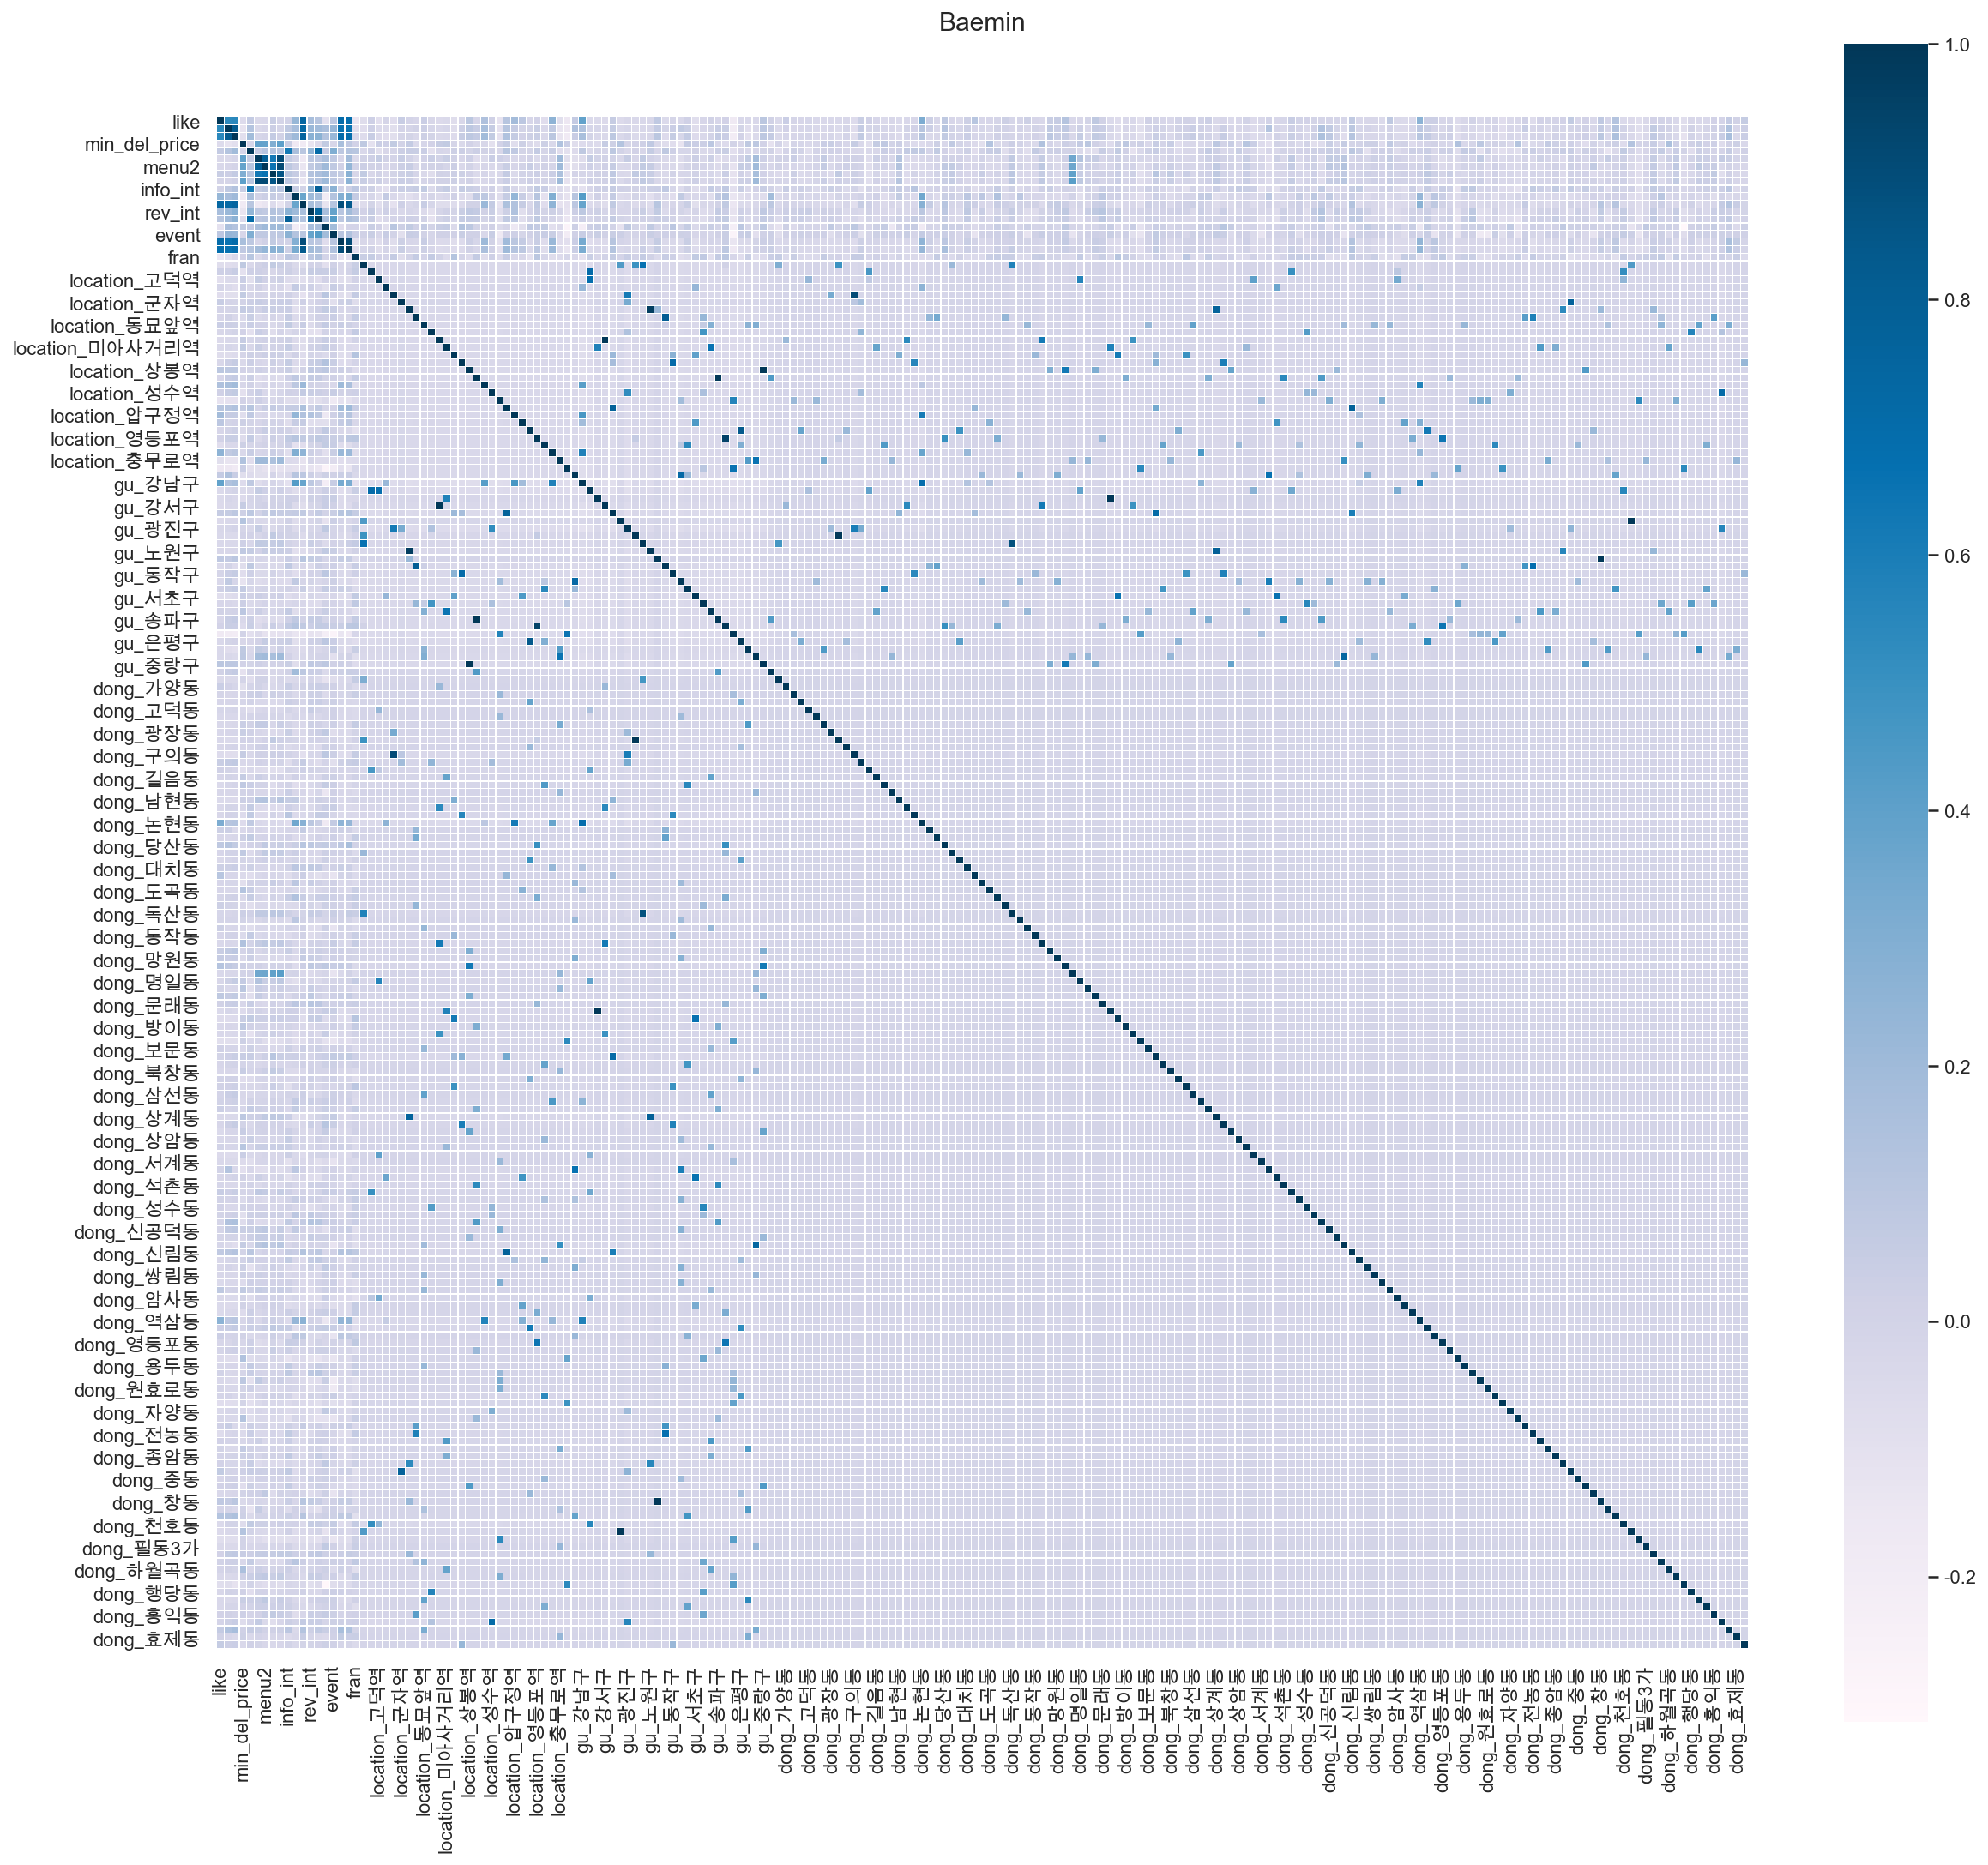

In [48]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 18))
plt.title("Baemin", y = 1.05, size = 15)
sns.heatmap(dum_df.astype(float).corr(),\
            linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap,\
            linecolor = "white", annot = False, annot_kws = {"size" : 10})


#### 전체컬럼별_상관계수

In [49]:
corr = dum_df.corr(method = 'pearson')
corr

like    review     reply  min_del_price  menu_int  \
like           1.000000  0.533817  0.545031      -0.061181  0.063049   
review         0.533817  1.000000  0.819513      -0.121008  0.126634   
reply          0.545031  0.819513  1.000000      -0.091057  0.189680   
min_del_price -0.061181 -0.121008 -0.091057       1.000000 -0.016858   
menu_int       0.063049  0.126634  0.189680      -0.016858  1.000000   
...                 ...       ...       ...            ...       ...   
dong_홍익동       0.009444  0.014727  0.003667       0.024788 -0.008147   
dong_화양동      -0.007189  0.028611  0.049055      -0.064228 -0.008745   
dong_황학동       0.060981  0.139566  0.169004       0.017906  0.052501   
dong_효제동       0.010888 -0.021828 -0.046558       0.024905 -0.038119   
dong_흑석동       0.056705  0.030743  0.039311      -0.036377  0.019181   

                  menu1     menu2     menu3  mean_price  info_int  ...  \
like          -0.044783 -0.036866  0.042455   -0.013933  0.000706  ...   
review        -0.045509 -0.023568  0.033173   -0.012901  0.081857  ...   
reply         -0.021227 -0.006612  0.060919    0.013043  0.131068  ...   
min_del_price  0.386188  0.382572  0.304500    0.401392  0.041354  ...   
menu_int       0.052511  0.108473  0.128768    0.108807  0.616447  ...   
...                 ...       ...       ...         ...       ...  ...   
dong_홍익동       0.008885  0.047565  0.068574    0.047073  0.025602  ...   
dong_화양동       0.065018 -0.045767 -0.079688   -0.023061  0.033257  ...   
dong_황학동       0.043339  0.012277  0.016577    0.027060  0.094945  ...   
dong_효제동      -0.010069 -0.025935 -0.027883   -0.023972 -0.054008  ...   
dong_흑석동      -0.001932 -0.031473 -0.033162   -0.024982 -0.000196  ...   

               dong_한강로동  dong_한남동  dong_행당동  dong_혜화동  dong_홍은동  dong_홍익동  \
like           -0.040173 -0.081957 -0.030860 -0.034950 -0.035399  0.009444   
review         -0.044318 -0.070227  0.011098 -0.044139 -0.015592  0.014727   
reply          -0.040296 -0.108613  0.003400 -0.039589 -0.012833  0.003667   
min_del_price   0.021376 -0.049322  0.016154  0.043224  0.009231  0.024788   
menu_int        0.037292  0.003137 -0.072875  0.033288  0.001804 -0.008147   
...                  ...       ...       ...       ...       ...       ...   
dong_홍익동       -0.004894 -0.008511 -0.006935 -0.006000 -0.004894  1.000000   
dong_화양동       -0.010691 -0.018591 -0.015149 -0.013106 -0.010691 -0.013106   
dong_황학동       -0.003992 -0.006942 -0.005657 -0.004894 -0.003992 -0.004894   
dong_효제동       -0.002820 -0.004904 -0.003996 -0.003457 -0.002820 -0.003457   
dong_흑석동       -0.002820 -0.004904 -0.003996 -0.003457 -0.002820 -0.003457   

               dong_화양동  dong_황학동  dong_효제동  dong_흑석동  
like          -0.007189  0.060981  0.010888  0.056705  
review         0.028611  0.139566 -0.021828  0.030743  
reply          0.049055  0.169004 -0.046558  0.039311  
min_del_price -0.064228  0.017906  0.024905 -0.036377  
menu_int      -0.008745  0.052501 -0.038119  0.019181  
...                 ...       ...       ...       ...  
dong_홍익동      -0.013106 -0.004894 -0.003457 -0.003457  
dong_화양동       1.000000 -0.010691 -0.007552 -0.007552  
dong_황학동      -0.010691  1.000000 -0.002820 -0.002820  
dong_효제동      -0.007552 -0.002820  1.000000 -0.001992  
dong_흑석동      -0.007552 -0.002820 -0.001992  1.000000  

[203 rows x 203 columns]

In [50]:
# TOP 상관계수 구하는 함수

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#### 인근전철역_상관계수_top20

In [51]:
# TOP 상관계수 구하는 함수

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [52]:
dum_met_df = pd.get_dummies(bm_df.drop(["name", "addr", "dong", "gu", "menu1", "menu2", "menu3", "rev_int",\
                                      "info_int", "menu_int", "sales_s" ], axis=1))
print(get_top_abs_correlations(dum_met_df, 20))

order          sales_w         0.833078
review         reply           0.819513
reply          order           0.756989
like           order           0.734343
review         order           0.725991
reply          sales_w         0.689025
like           sales_w         0.682725
review         sales_w         0.660227
like           reply           0.545031
               review          0.533817
total_int      event           0.427709
min_del_price  mean_price      0.401392
runtime_wk(분)  order           0.370773
               sales_w         0.331569
               location_청담역    0.301617
rate           location_한남역    0.274930
reply          total_int       0.270586
mean_price     sales_w         0.261985
like           location_청담역    0.259379
order          location_청담역    0.253193
dtype: float64


- 자치구, 행정동 뿐 아니라, 인근전철역 데이터가 딱히 큰 상관관계를 가지지 않는다

#### 단순매출액_상관계수

In [53]:
# sales_s의 feature에 대한 상관계수

dum_sales_df = pd.get_dummies(bm_df.drop(["name", "addr", "menu1", "menu2", "menu3", "rev_int",\
                                      "info_int", "menu_int", "sales_w"], axis=1))

cols = dum_sales_df.columns

cols_list = []
corr_list = []

for col in cols:
    corr_data = dum_sales_df["sales_s"].corr(dum_sales_df[col])
    cols_list.append(col)
    corr_list.append(corr_data)
    # print("{} : ".format(col), dum_sales_df["sales"].corr(dum_sales_df[col]))
    
corr_df = pd.DataFrame({"name":cols_list})    
corr_df["sales_corr"] = corr_list
corr_df_sort = corr_df.sort_values(by="sales_corr", ascending=False)
corr_df_sort.head(20)

name  sales_corr
10         sales_s    1.000000
6            order    0.887640
0             like    0.700315
2            reply    0.700055
1           review    0.658140
41          gu_강남구    0.337838
5    runtime_wk(분)    0.291907
86        dong_논현동    0.252253
152       dong_역삼동    0.244901
37    location_청담역    0.222588
28    location_선릉역    0.206491
31    location_신림역    0.196685
193       dong_황학동    0.167893
3    min_del_price    0.166580
143       dong_신림동    0.129269
45          gu_관악구    0.114988
9            event    0.104840
32   location_압구정역    0.101466
154       dong_연의동    0.100800
89        dong_당산동    0.095119

#### 가중매출액_상관계수

In [54]:
# sales_w의 feature에 대한 상관계수

dum_sales_w_df = pd.get_dummies(bm_df.drop(["name", "addr", "menu1", "menu2", "menu3", "rev_int",\
                                      "info_int", "menu_int", "sales_s"], axis=1))

cols = dum_sales_w_df.columns

cols_list = []
corr_list = []

for col in cols:
    corr_data = dum_sales_w_df["sales_w"].corr(dum_sales_w_df[col])
    cols_list.append(col)
    corr_list.append(corr_data)
    # print("{} : ".format(col), dum_sales_df["sales"].corr(dum_sales_df[col]))
    
corr_df = pd.DataFrame({"name":cols_list})    
corr_df["sales_corr"] = corr_list
corr_df_sort = corr_df.sort_values(by="sales_corr", ascending=False)
corr_df_sort.head(20)

name  sales_corr
10         sales_w    1.000000
6            order    0.833078
2            reply    0.689025
0             like    0.682725
1           review    0.660227
5    runtime_wk(분)    0.331569
41          gu_강남구    0.322258
4       mean_price    0.261985
152       dong_역삼동    0.242779
86        dong_논현동    0.232491
37    location_청담역    0.212076
31    location_신림역    0.200067
89        dong_당산동    0.167993
28    location_선릉역    0.163141
7        total_int    0.158864
193       dong_황학동    0.141174
9            event    0.137660
45          gu_관악구    0.122684
32   location_압구정역    0.121549
143       dong_신림동    0.119681

### target, feature 선택

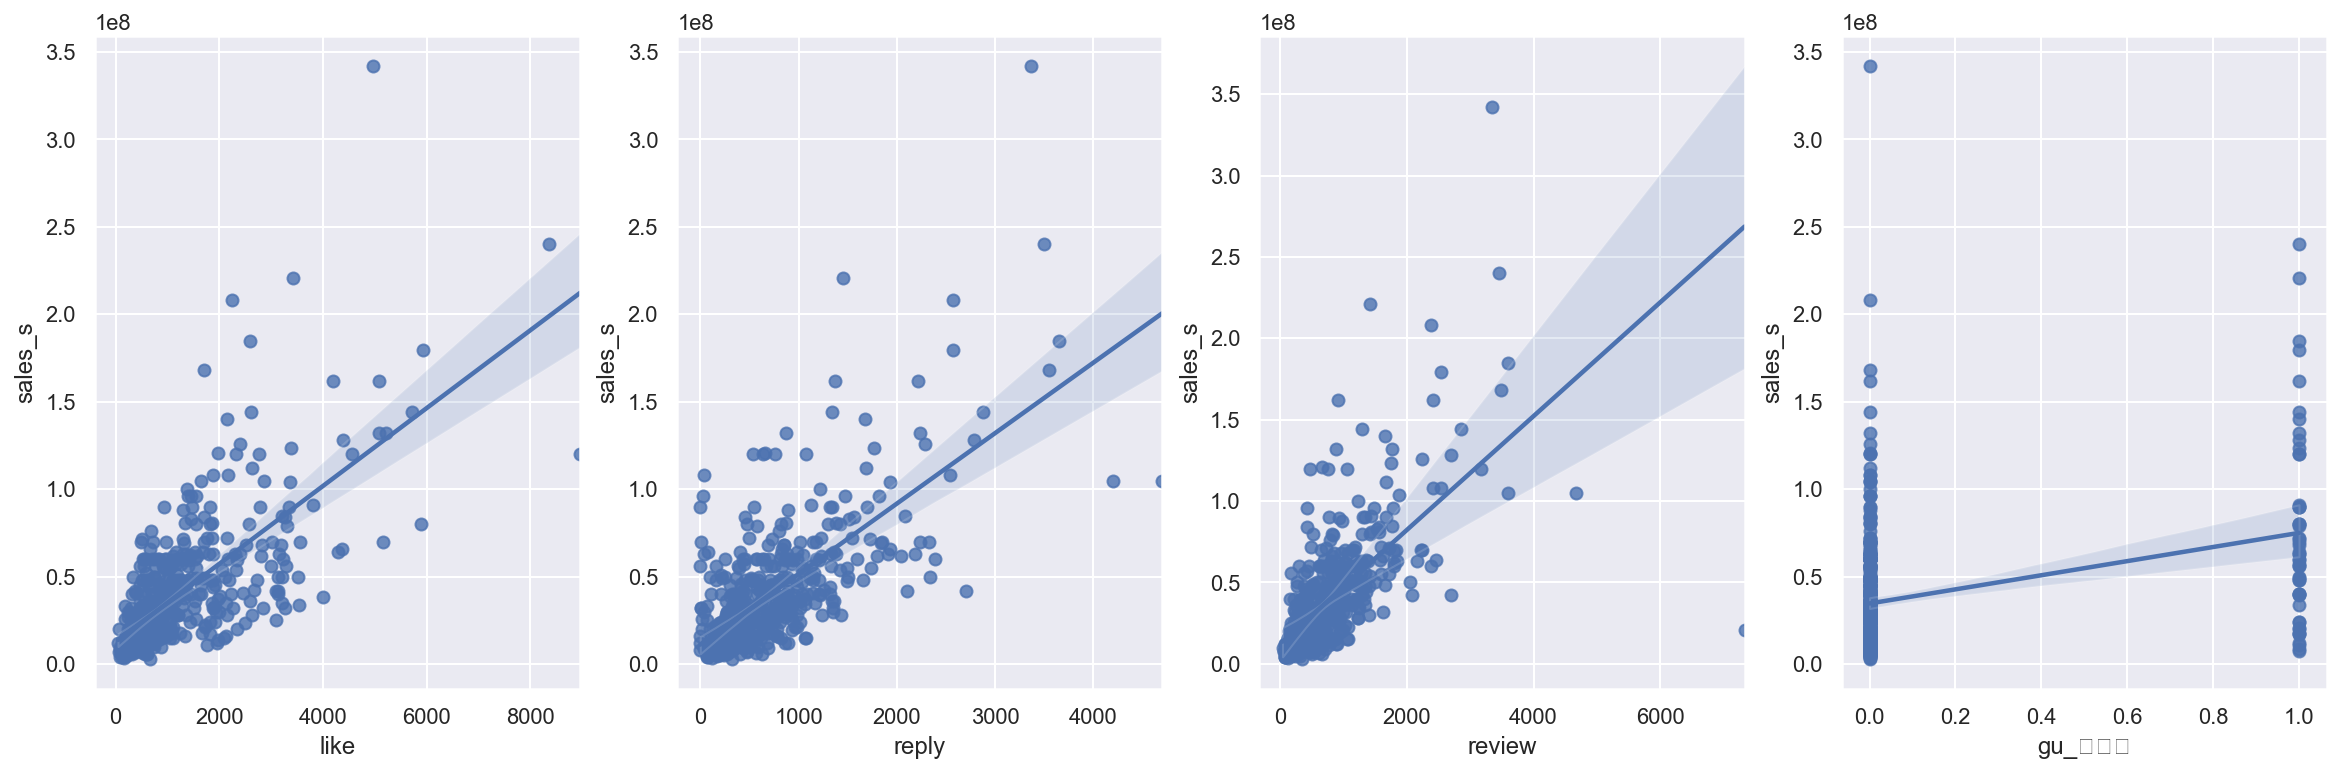

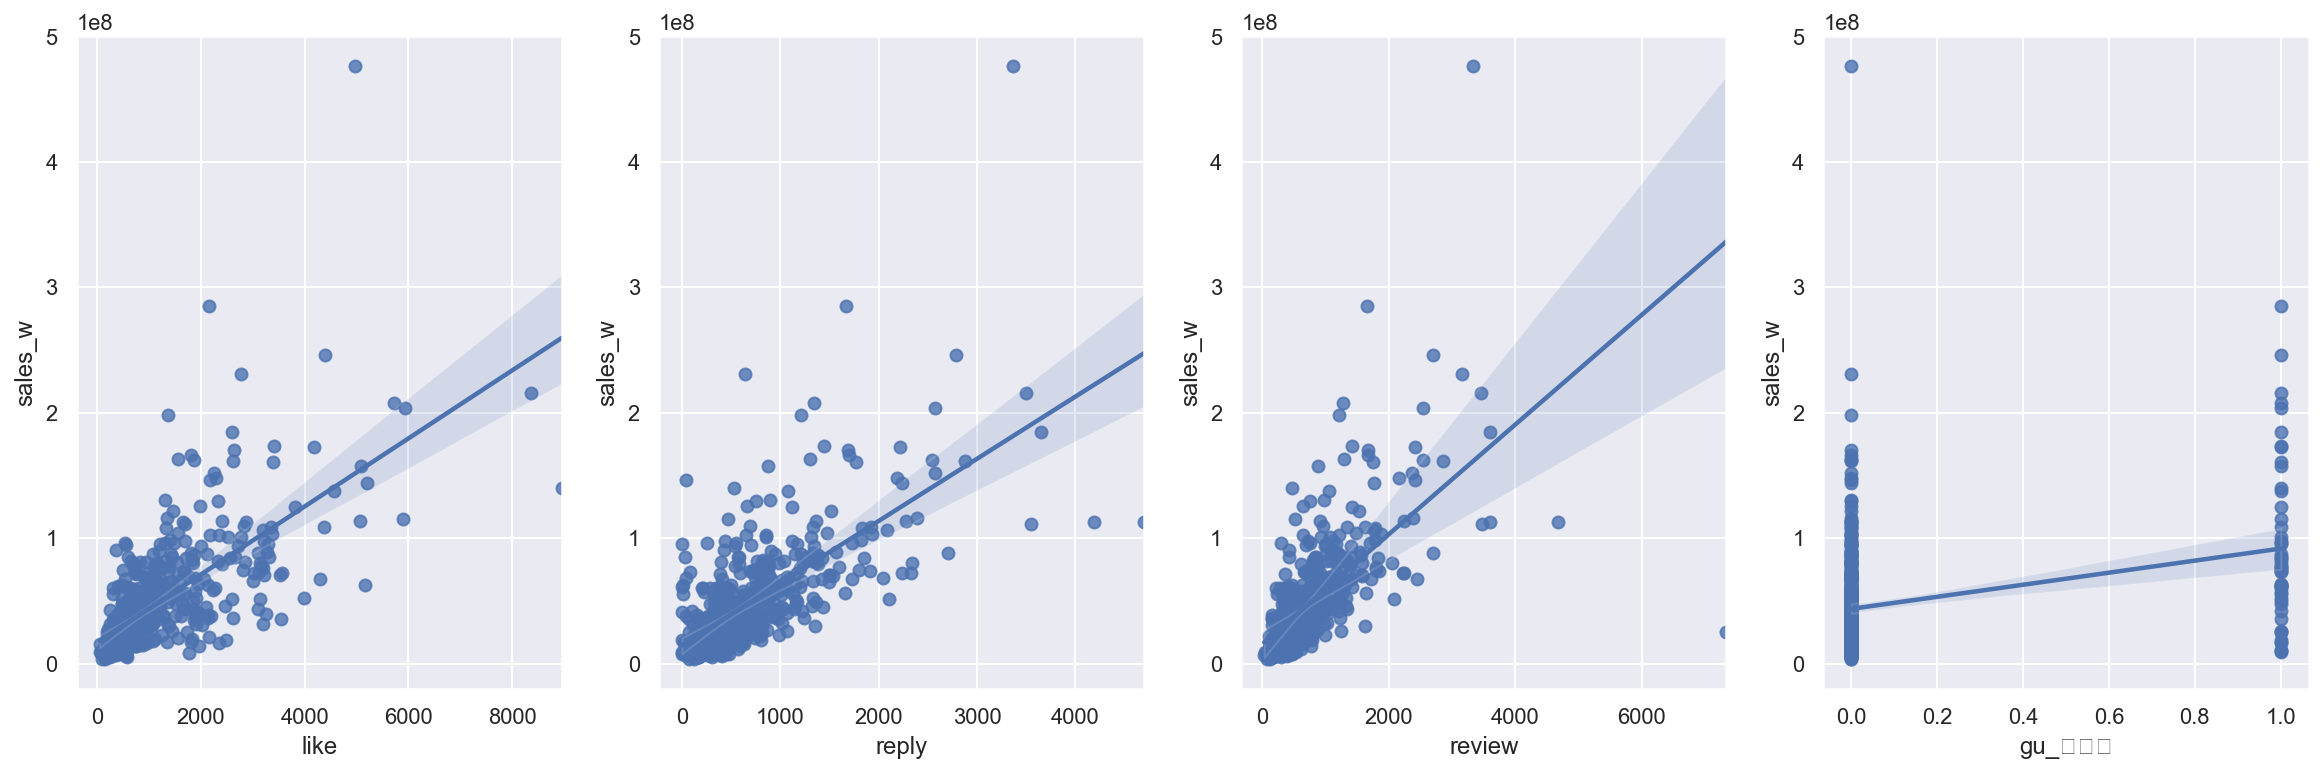

In [55]:
# 단순 매출액
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(ncols=4)

sns.regplot(x='like', y='sales_s', data=dum_df, ax=ax[0])
sns.regplot(x='reply', y='sales_s', data=dum_df, ax=ax[1])
sns.regplot(x='review', y='sales_s', data=dum_df, ax=ax[2])
sns.regplot(x='gu_강남구', y='sales_s', data=dum_df, ax=ax[3])


# 가중치 매출액
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots(ncols=4)

sns.regplot(x='like', y='sales_w', data=dum_df, ax=ax[0])
sns.regplot(x='reply', y='sales_w', data=dum_df, ax=ax[1])
sns.regplot(x='review', y='sales_w', data=dum_df, ax=ax[2])
sns.regplot(x='gu_강남구', y='sales_w', data=dum_df, ax=ax[3])

- 1) target 선택
    - 단순매출액과 가중매출액의 feature데이터에 대한 상관계수 top5를 비교해봤을 때
    - 단순매출액에 대한 상관계수 값이 더 높은 것으로 나타남
    - => **단순매출액(sales_s) 컬럼을 타겟으로** 선정하여 매출액 예측모델 돌리기


- 2) 유의미 feature 선택
    - 상관계수가 0.3 이상인 column data만 유의미한 것으로 간주    
    - 상관계수 0.6 이상 : **주문수 order, 찜수 like, 사장댓글수 reply, 이용후기수 review,**
    - 상관계수 0.3 이상 : **강남구 위치 gu_강남구, 주당 운영시간 runtime_wk(분)**

### column별 이상치 확인

#### 주문수 이상치

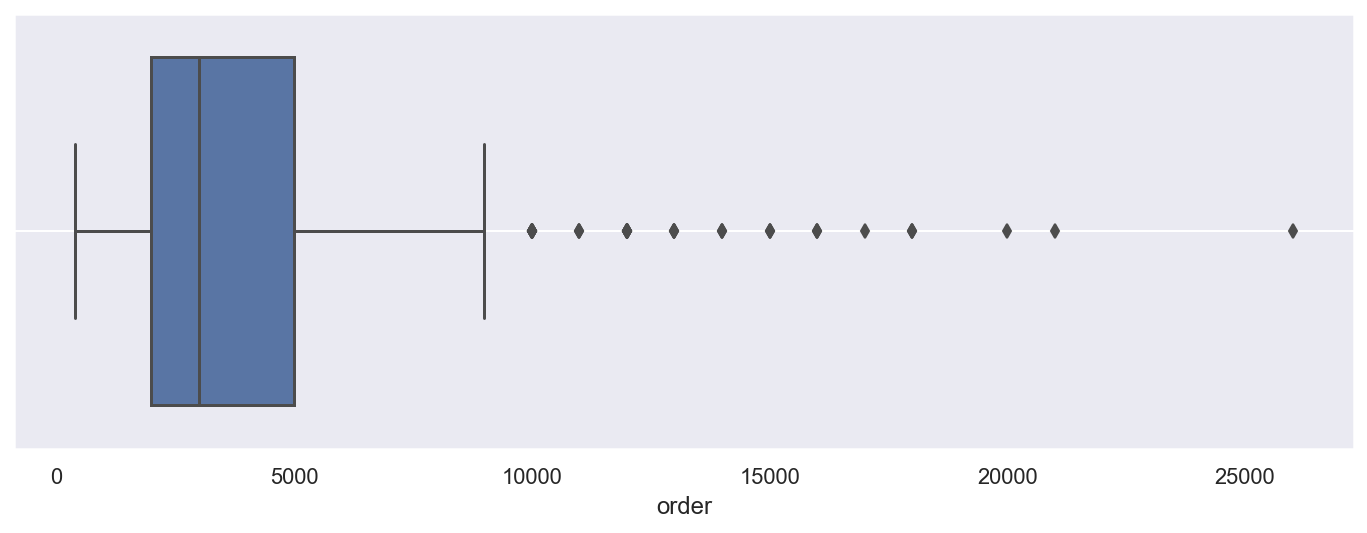

In [56]:
# 최근주문수 ('order') 분포 시각화 

plt.figure(figsize=(12,4))
sns.boxplot(bm_df["order"])
plt.grid()
plt.show()

In [57]:
bm_df[bm_df['order']>25000]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
1  혼밥대왕 강남점  5934    2537   2574           6900        21   7400   8400   

   menu3  mean_price  ...  rev_int  total_int  rate event  location  \
1   9400        8400  ...       27         69   4.6     1       청담역   

     sales_s      sales_w  fran   gu  dong  
1  179400000  204100000.0     1  강남구   논현동  

[1 rows x 24 columns]

`2만5천 주문수 실화임.. "강남" == "프로혼밥러들의_서식지"`

#### 찜수 이상치

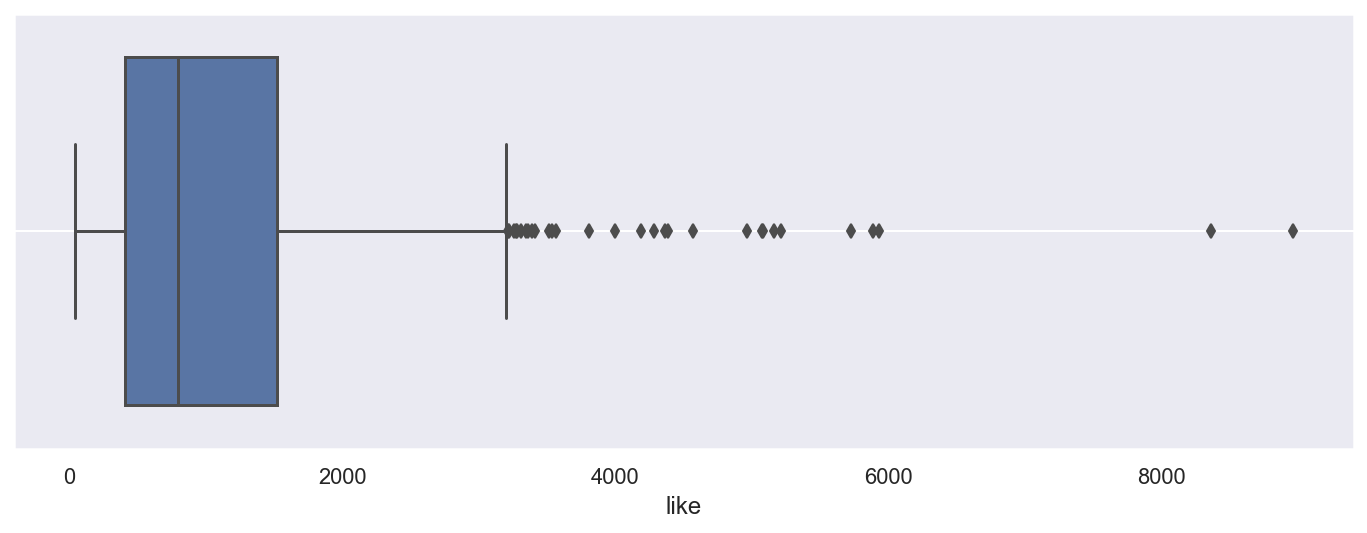

In [58]:
# 찜수 ('like') 분포 시각화 

plt.figure(figsize=(12,4))
sns.boxplot(bm_df["like"])
plt.grid()
plt.show()

In [59]:
bm_df[bm_df['like']>8000]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
31  논현밀밭&직화구이  8362    3456   3496          12000        18   8000   8000   
50     1인가득밥상  8963     469    532          10000         9   8000  11000   

    menu3  mean_price  ...  rev_int  total_int  rate event  location  \
31  16000       10667  ...        9         66   4.8     1       선릉역   
50  20500       13167  ...        5         25   4.4     1       양재역   

      sales_s      sales_w  fran   gu  dong  
31  240000000  216000000.0     0  강남구   논현동  
50  120000000  140400000.0     0  강남구   역삼동  

[2 rows x 24 columns]

#### 사장댓글수 이상치

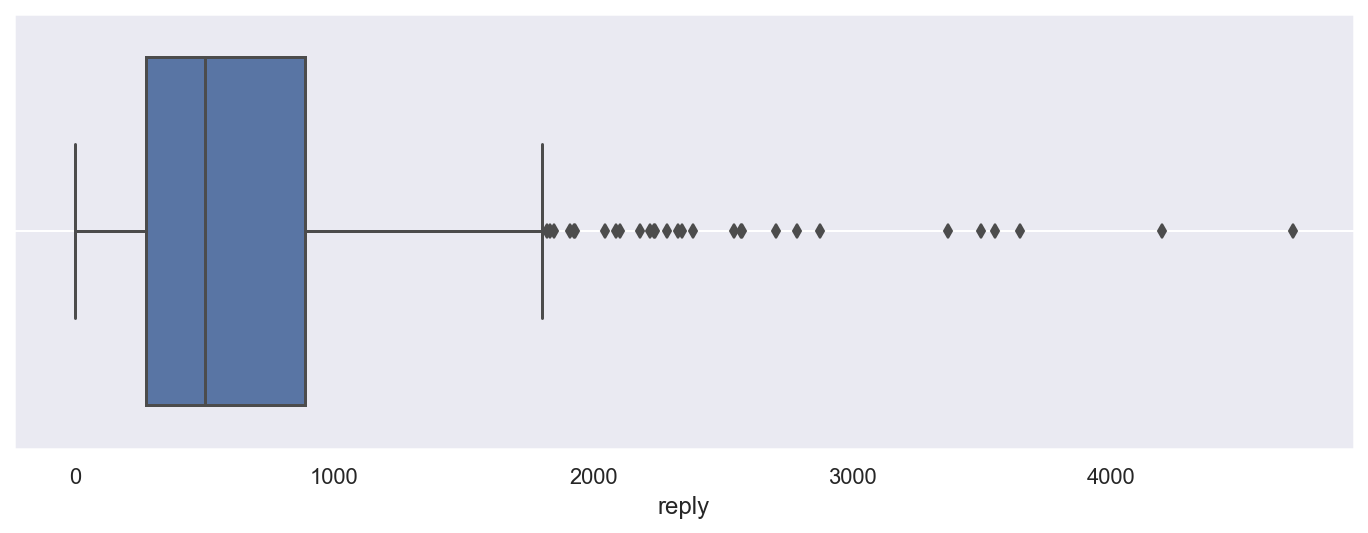

In [60]:
# 사장댓글수 ('reply') 분포 시각화 

plt.figure(figsize=(12,4))
sns.boxplot(bm_df["reply"])
plt.grid()
plt.show()

In [61]:
bm_df[bm_df['reply']>4000]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
145  차고집냉면 송파점  1650    4672   4701           7000        19   7000   7000   
217  차고집칡냉면 본점  2864    3599   4196           7000         5   7000   7000   

     menu3  mean_price  ...  rev_int  total_int  rate event  location  \
145   9750        7917  ...       39         99   4.9     1       석촌역   
217   9750        7917  ...       35         45   4.8     1       고덕역   

       sales_s      sales_w  fran   gu  dong  
145  105000000  113250000.0     1  송파구   송파동  
217  105000000  113250000.0     1  강동구   명일동  

[2 rows x 24 columns]

`리뷰이벤트로 돈까스, 새우튀김, 갈비만두 증정하는 곳... 그만큼 사장님 댓글수도 많고, 찜수도 많음`

#### 사용자 리뷰수 이상치

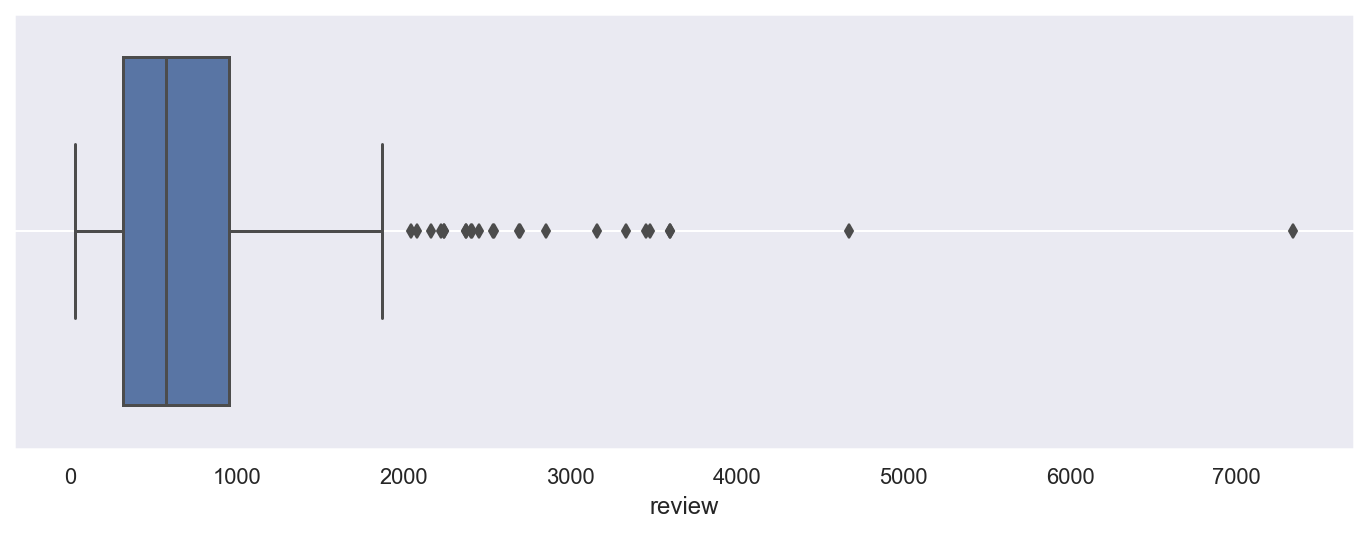

In [62]:
# 리뷰수 ('review') 분포 시각화 

plt.figure(figsize=(12,4))
sns.boxplot(bm_df["review"])
plt.grid()
plt.show()

In [63]:
bm_df[bm_df['review']>4000]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
145  차고집냉면 송파점  1650    4672   4701           7000        19   7000   7000   
433       진수성찬  1723    7336    324           7000         5   8000  12000   

     menu3  mean_price  ...  rev_int  total_int  rate event  location  \
145   9750        7917  ...       39         99   4.9     1       석촌역   
433   8000        9333  ...        4         15   4.9     1     홍대입구역   

       sales_s      sales_w  fran   gu  dong  
145  105000000  113250000.0     1  송파구   송파동  
433   21000000   25500000.0     0  마포구   서교동  

[2 rows x 24 columns]

`진수성찬 review data 오기`

In [64]:
# review가 7336인 업체는 진수성찬뿐이므로 column기준 데이터 replace 가능
bm_df[bm_df["review"]==7336]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  menu3  \
433  진수성찬  1723    7336    324           7000         5   8000  12000   8000   

     mean_price  ...  rev_int  total_int  rate event  location   sales_s  \
433        9333  ...        4         15   4.9     1     홍대입구역  21000000   

        sales_w  fran   gu  dong  
433  25500000.0     0  마포구   서교동  

[1 rows x 24 columns]

In [65]:
# 진수성찬 원본 review수로 수정
bm_df.replace({'review': 7336}, {'review': 876}, inplace=True)
bm_df[bm_df["name"]=="진수성찬"]["review"]

433    876
Name: review, dtype: int64

In [66]:
# 수정결과 확인, 잘 됨
bm_df[bm_df['review']>4000]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
145  차고집냉면 송파점  1650    4672   4701           7000        19   7000   7000   

     menu3  mean_price  ...  rev_int  total_int  rate event  location  \
145   9750        7917  ...       39         99   4.9     1       석촌역   

       sales_s      sales_w  fran   gu  dong  
145  105000000  113250000.0     1  송파구   송파동  

[1 rows x 24 columns]

#### 운영시간 이상치

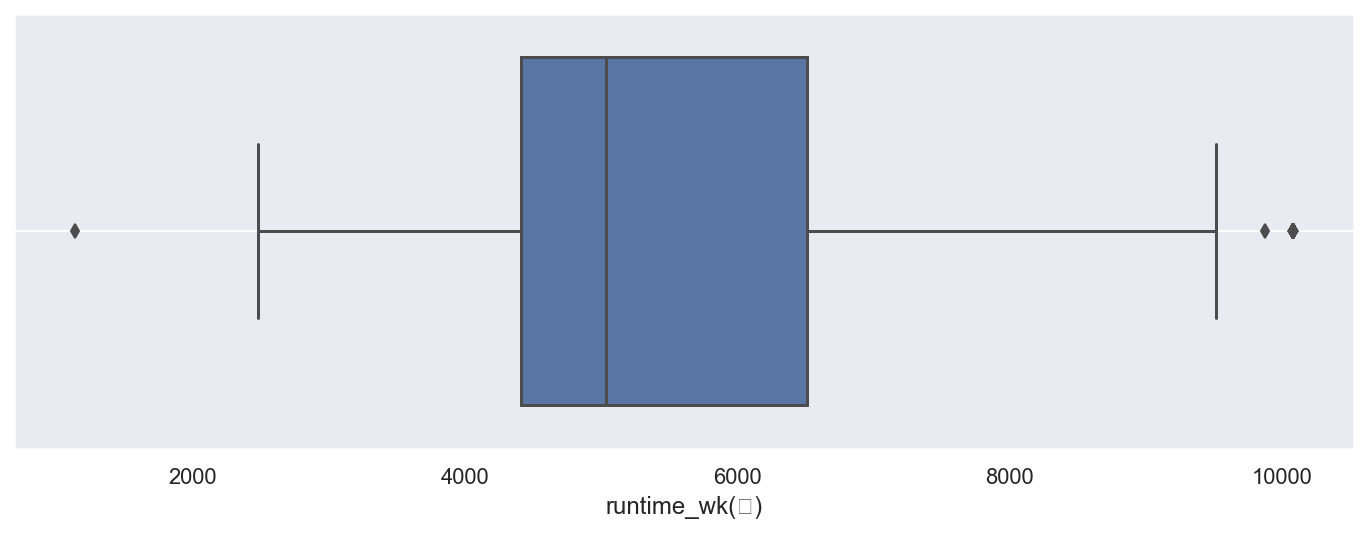

In [67]:
# 운영시간 ('runtime_wk(분)') 분포 시각화 

plt.figure(figsize=(12,4))
sns.boxplot(bm_df["runtime_wk(분)"])
plt.grid()
plt.show()

In [68]:
# 주7일 24시간 10080분을 넘는 곳 없음
bm_df[bm_df['runtime_wk(분)']>10080]

Empty DataFrame
Columns: [name, like, review, reply, min_del_price, menu_int, menu1, menu2, menu3, mean_price, info_int, runtime_wk(분), order, addr, rev_int, total_int, rate, event, location, sales_s, sales_w, fran, gu, dong]
Index: []

[0 rows x 24 columns]

In [69]:
bm_df[bm_df['runtime_wk(분)']<2000]

name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
280  육회바른연어   735     769    222           5900        14   5900   5900   

     menu3  mean_price  ...  rev_int  total_int  rate event  location  \
280  12900        8233  ...       31         59   4.9     1      답십리역   

      sales_s     sales_w  fran   gu  dong  
280  11800000  14600000.0     0  성동구   홍익동  

[1 rows x 24 columns]

`육회바른연어 운영시간 data 오기`

In [70]:
# 운영시간이 1140인 업체는 육회바른연어뿐이므로 column기준 데이터 replace 가능
print(bm_df[bm_df["name"]=="육회바른연어"]["runtime_wk(분)"])
bm_df[bm_df["runtime_wk(분)"] == 1140]

280    1140
Name: runtime_wk(분), dtype: int64


name  like  review  reply  min_del_price  menu_int  menu1  menu2  \
280  육회바른연어   735     769    222           5900        14   5900   5900   

     menu3  mean_price  ...  rev_int  total_int  rate event  location  \
280  12900        8233  ...       31         59   4.9     1      답십리역   

      sales_s     sales_w  fran   gu  dong  
280  11800000  14600000.0     0  성동구   홍익동  

[1 rows x 24 columns]

In [71]:
bm_df.replace({"runtime_wk(분)": 1140}, {"runtime_wk(분)": 6230}, inplace=True)
bm_df[bm_df["name"]=="육회바른연어"]["runtime_wk(분)"]

280    6230
Name: runtime_wk(분), dtype: int64

#### column 이상치 처리 적용

In [72]:
# sales column 이상치를 제외한 이상치 처리 결과
dum_df = pd.get_dummies(bm_df.drop(["name", "addr"], axis=1))

### Target 이상치 확인

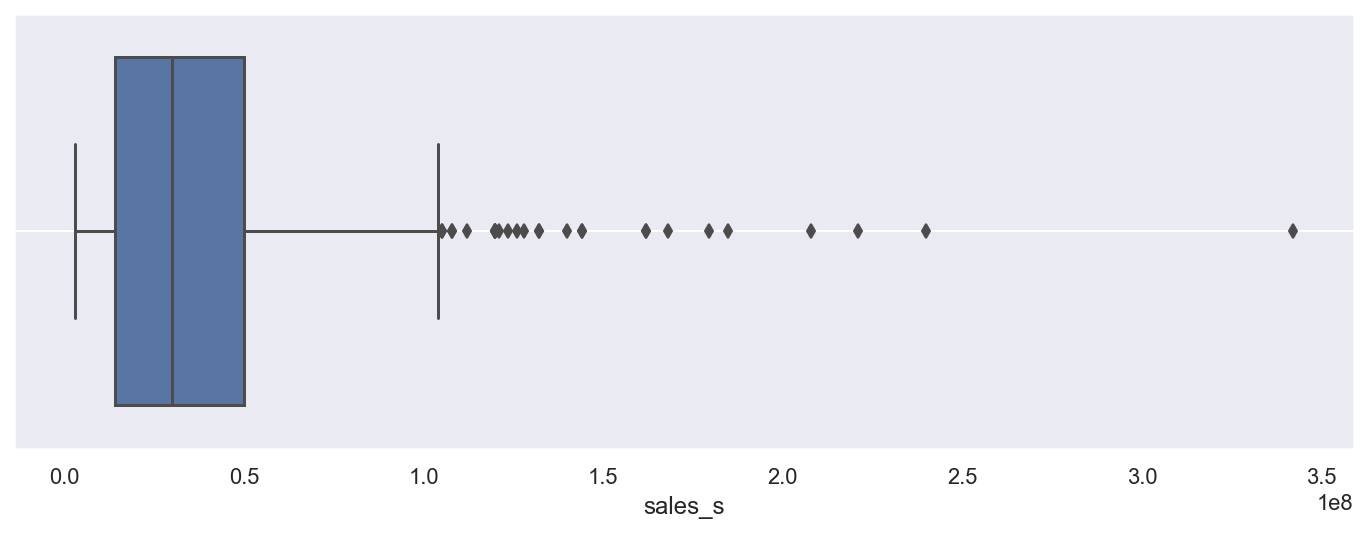

In [73]:
# 단순매출액 ('sales_s') 분포 시각화 

plt.figure(figsize=(12,4))
sns.boxplot(bm_df["sales_s"])
plt.grid()
plt.show()

- 대부분 월 1천~5천만원의 매출액을 기록함
- 소위 몇몇 "대박집"이 월 1억원 이상의 매출액을 기록하는 이상치로 분포함

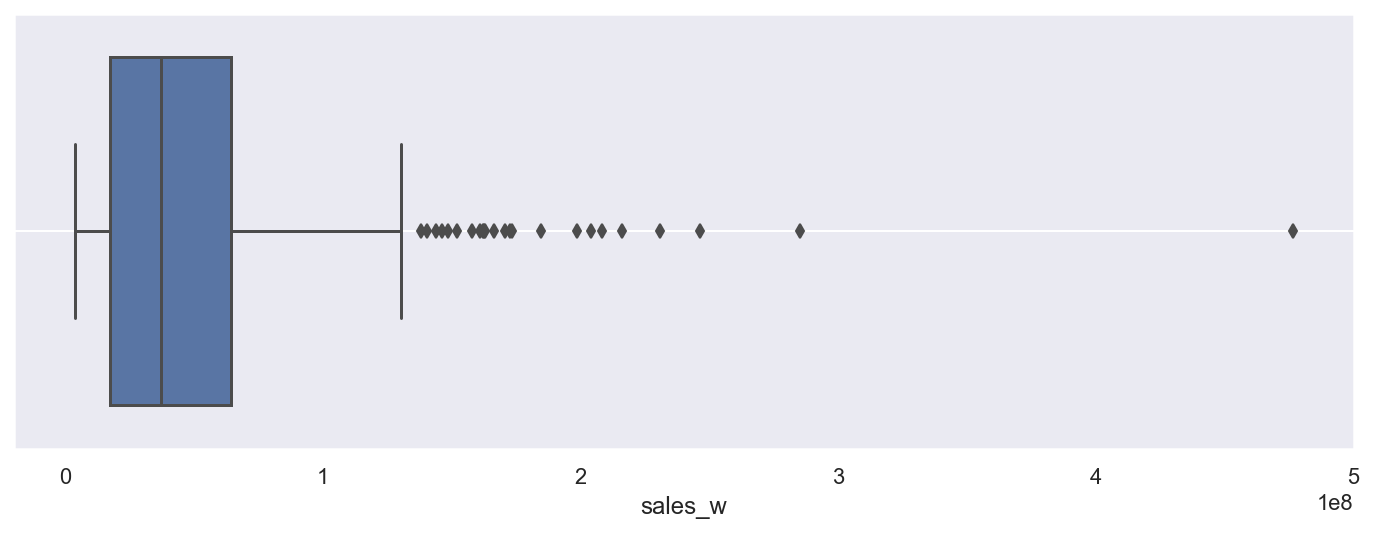

In [74]:
# 가중매출액

plt.figure(figsize=(12,4))
sns.boxplot(bm_df["sales_w"])
plt.grid()
plt.show()

In [75]:
# 이상치 확인
# 월 1억 5천만원 이상의 매출액을 기록하는 업체

bm_df[bm_df['sales_s']>150000000]

name  like  review  reply  min_del_price  menu_int  menu1  \
1          혼밥대왕 강남점  5934    2537   2574           6900        21   7400   
13          숯불고기 냉면  3415    1421   1447          13000        13   9000   
19         한사바리 해장국  4187    2409   2219           9000        19   9000   
31        논현밀밭&직화구이  8362    3456   3496          12000        18   8000   
39             88식당  2592    3598   3648           8800        15   8800   
101  고기혁명 이곳은 전설이되다  4967    3339   3368          19000        18  19900   
298         상봉냉면칼국수  5073     907   1366          13500         0   7500   
317        천수냉면 신당점  2251    2375   2570          13000        15   8000   
488          얼음골칡냉면  1697    3479   3550          14000         7   7000   

     menu2  menu3  mean_price  ...  rev_int  total_int  rate event  location  \
1     8400   9400        8400  ...       27         69   4.6     1       청담역   
13    9000   9000        9000  ...       10         42   4.7     1       청담역   
19   10000  11000       10000  ...       17         58   4.9     1      압구정역   
31    8000  16000       10667  ...        9         66   4.8     1       선릉역   
39    8800   8800        8800  ...       16         59   4.8     1       선릉역   
101  33000  41000       31300  ...       16         52   4.9     1       신림역   
298   7500   8500        7833  ...       35         42   4.8     1       상봉역   
317   8000   8000        8000  ...       26         71   4.8     1      동묘앞역   
488   7000   8000        7333  ...       21         35   4.9     1      연신내역   

       sales_s      sales_w  fran   gu  dong  
1    179400000  204100000.0     1  강남구   논현동  
13   221000000  173400000.0     0  강남구   역삼동  
19   162000000  172800000.0     0  강남구   논현동  
31   240000000  216000000.0     0  강남구   논현동  
39   184800000  184800000.0     0  강남구   역삼동  
101  342000000  476460000.0     0  관악구   봉천동  
298  162000000  114000000.0     0  중랑구   면목동  
317  208000000  152000000.0     1   중구   황학동  
488  168000000  111600000.0     0  은평구   역촌동  

[9 rows x 24 columns]

- 이상치 9곳 중 5곳이 강남구에 위치함

In [76]:
# 강남구의 매출액 평균
print("강남구 업체수 : ", len(bm_df[bm_df["gu"]=="강남구"]))
print("강남구 평균 매출액: ",round(np.mean(bm_df.sales_s[bm_df["gu"]=="강남구"]), 2))

강남구 업체수 :  52
강남구 평균 매출액:  75059615.38


- 강남구에 위치한 52개 업체의 매출액 평균 : 7500만원
- => 평균 3800만원의 매출액을 기록하는
- => 1~5천만원 사이에 분포하는 일반 업체들과 크게 차이남

In [77]:
idx_nm = bm_df[bm_df['sales_s'] >= 150000000].index
bm_df_out = bm_df.drop(idx_nm)
dum_df_out = dum_df.drop(idx_nm)

print("강남구 업체수 : ", len(bm_df_out[bm_df_out["gu"]=="강남구"]))
print("강남구 평균 매출액: ",round(np.mean(bm_df_out.sales_s[bm_df_out["gu"]=="강남구"]), 2))

강남구 업체수 :  47
강남구 평균 매출액:  62040425.53


- 이상치 제거한 결과, 강남구와 일반 업체간의 매출액 차이가 줄어듦

In [78]:
fig = px.histogram(bm_df, x='sales_s')
fig.show()

In [79]:
fig = px.histogram(bm_df_out, x='sales_s')
fig.show()

## 선형회귀 예측

In [80]:
from sklearn.model_selection import train_test_split

X = dum_df[["order", "like", "reply", "review", "gu_강남구", "runtime_wk(분)"]]
y = dum_df['sales_s']

X_ss = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,
                                                   random_state=13)

In [81]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
from sklearn.metrics import mean_squared_error

# 단순매출액_이상치_미제거
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr1 = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test1 = (np.sqrt(mean_squared_error(y_test, pred_test)))

In [83]:
# 가중매출액_이상치_미제거

X = dum_df[["order", "like", "reply", "review", "gu_강남구", "runtime_wk(분)"]]
y = dum_df['sales_w']

X_ss = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,
                                                   random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr2 = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test2 = (np.sqrt(mean_squared_error(y_test, pred_test)))

In [84]:
# 단순매출액_이상치_제거

X = dum_df_out[["order", "like", "reply", "review", "gu_강남구", "runtime_wk(분)"]]
y = dum_df_out['sales_s']

X_ss = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,
                                                   random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr3 = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test3 = (np.sqrt(mean_squared_error(y_test, pred_test)))

In [85]:
# 가중매출액 이상치 제거

X = dum_df_out[["order", "like", "reply", "review", "gu_강남구", "runtime_wk(분)"]]
y = dum_df_out['sales_w']

X_ss = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,
                                                   random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr4 = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test4 = (np.sqrt(mean_squared_error(y_test, pred_test)))


In [86]:
# 단순매출액 col 4개로 축소

X = dum_df_out[["order", "like", "reply", "review"]]
y = dum_df_out['sales_s']

X_ss = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,
                                                   random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr5 = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test5 = (np.sqrt(mean_squared_error(y_test, pred_test)))


In [87]:
# 가중매출액 col 4개로 축소

X = dum_df_out[["order", "like", "reply", "review"]]
y = dum_df_out['sales_w']

X_ss = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,
                                                   random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr6 = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test6 = (np.sqrt(mean_squared_error(y_test, pred_test)))

In [88]:
result_df = pd.DataFrame()
result_df["rmse_train"] = [rmse_tr1, rmse_tr2, rmse_tr3, rmse_tr4, rmse_tr5, rmse_tr6]
result_df["rmse_test"] = [rmse_test1, rmse_test2, rmse_test3, rmse_test4, rmse_test5, rmse_test6]
result_df.index = ["단순매출액_6col", "가중매출액_6col", "단순매출액_이상치9", "가중매출액_이상치9",\
                  "단순매출액_4col", "가중매출액_4col"]
result_df["rmse_train"]= result_df["rmse_train"].map(lambda data: int(round(data,0)))
result_df["rmse_test"]= result_df["rmse_test"].map(lambda data: int(round(data,0)))

print("========단순매출액 중위값=========", "\n", np.median(bm_df["sales_s"]),"=> 3000만원","\n")
print("========가중매출액 중위값=========", "\n", np.median(bm_df["sales_w"]), "=> 3720만원","\n")
print("====단순매출액_이상치처리후_중위값====", "\n", np.median(bm_df_out["sales_s"]),"=> 2875만원","\n")
print("====가중매출액_이상치처리후_중위값====", "\n", np.median(bm_df_out["sales_w"]),"=> 3645만원","\n")

result_df

========단순매출액 중위값========= 
 30000000.0 => 3000만원 

========가중매출액 중위값========= 
 37200000.0 => 3720만원 

====단순매출액_이상치처리후_중위값==== 
 28750000.0 => 2875만원 

====가중매출액_이상치처리후_중위값==== 
 36450000.0 => 3645만원 



rmse_train  rmse_test
단순매출액_6col    16989834   13981828
가중매출액_6col    25148644   18585879
단순매출액_이상치9    12466694   13036463
가중매출액_이상치9    20832936   18995377
단순매출액_4col    12509030   12918245
가중매출액_4col    21084874   18995040

**단순매출액(sales_s)를 target으로 설정하고, feature column을 4개로 줄인 모델의 오차가 가장 작은 것으로 나타났다**

## 예측결과

### 돈 잘버는 업체의 성공비결?

#### 주문수, 찜수, 사장님댓글수, 이용자 후기가 많고, 운영시간이 길다

In [89]:
corr_df_sort.head(10)

name  sales_corr
10         sales_w    1.000000
6            order    0.833078
2            reply    0.689025
0             like    0.682725
1           review    0.660227
5    runtime_wk(분)    0.331569
41          gu_강남구    0.322258
4       mean_price    0.261985
152       dong_역삼동    0.242779
86        dong_논현동    0.232491

- 주문수, 찜수, 사장님 댓글수, 이용자 후기, 운영시간 모두
- 매출액과의 양의 상관관계가 상식적으로 이해되는 부분이다

#### 강남구에 위치한다

In [90]:
# 구별 평균 매출액

A = []
B = []
C = []
index = []
names = gu.unique()

for gu_name in names:
    name = ''.join(gu_name).strip()
    a = round(np.mean(bm_df.sales_s[bm_df["gu"] == name]), 0)
    b = round(np.max(bm_df.sales_s[bm_df["gu"] == name]), 0)
    c = round(np.min(bm_df.sales_s[bm_df["gu"] == name]), 0)
    A.append(a)
    B.append(b)
    C.append(c)

sales_gu = pd.DataFrame(
    [{"gu":names[0], "mean_sales": A[0], "max_sales": B[0], "min_sales": C[0]}])

for n in range(1,24):
    sales_ = pd.DataFrame(
        [{"gu":names[n], "mean_sales": A[n], "max_sales": B[n], "min_sales": C[n]}])
    sales_gu = sales_gu.append(sales_)

sales_gu.set_index("gu", inplace=True)
sales_df_sort = sales_gu.sort_values(by="mean_sales", ascending=False)

# 도봉구 1건 data 삭제
sales_df_sort = sales_df_sort.drop(sales_df_sort.index[0])

print("========= 구별 평균/최대/최소 매출액 =========")
print(" ================ top 6 ===============")
sales_df_sort.head(6)

========= 구별 평균/최대/최소 매출액 =========
 ================ top 6 ===============


mean_sales  max_sales  min_sales
gu                                     
강남구    75059615.0  240000000    7500000
관악구    55787586.0  342000000    4740000
서대문구   48076923.0  121000000    8000000
영등포구   47215789.0  132000000    8000000
중랑구    44325000.0  162000000    3000000
금천구    38488889.0  100000000    8400000

**왜 강남구일까?**

In [91]:
# 서울시 데이터광장의 2020년도 2/4분기 자치구별 인구수 데이터
pop = pd.read_csv("gu_pop_2020.csv")

# 서울시 데이터광장의 2020년도 2/4분기 자치구별 중위연령 데이터
age = pd.read_csv("gu_age_2020.csv")

# 서울시 데이터광장의 2017년도(최신) 자치구별 1인당 지역내총생산 및 수준지수 데이터
income = pd.read_csv("gu_income_2020.csv")

seoul_gu = pd.concat([pop, age, income], axis=1)

print("       <서울시 자치구별 인구수/중위연령/소득 데이터>")

seoul_gu.head(6)

       <서울시 자치구별 인구수/중위연령/소득 데이터>


gu population   gu   age    gu      income
0  송파구    280,135  관악구  39.8   강남구  65,387,478
1  관악구    273,715  마포구  40.5    중구  51,213,292
2  강서구    265,252  광진구  41.2   서초구  33,772,132
3  강남구    233,484  강남구  41.5  영등포구  32,055,158
4  노원구    217,897  송파구  41.5   종로구  31,416,328
5  은평구    210,664  서초구  41.6   송파구  26,815,980

- 뚜렷한 상관관계를 보이지 않음

> 약한 상관관계의 원인 (추측)
    >
    >- 주민등록상 인구와 실거주 인구에 차이가 있기에 현실반영률이 떨어짐
    >- 해당 자치구의 소득수준 중 거주민의 소득 비중이 크지 않음

>=> 지역별 매출액에 영향을 미치는 소비자 특성을 파악하기 위해
>-      <결제시점>과 <배달지역> 데이터가 필요함

### 시뮬레이팅

#### 손익분기점 넘을 수 있을까?

- **if...**
![simulation](https://media.discordapp.net/attachments/746440481629536321/749622890038689842/2020-08-30_10.32.56.png?width=1706&height=867)

> - 임대료 : 2000만원 / 150만원
> - 시설비 : 300만원 (가스렌지, 냉장고, 포장기)
> - 인건비 : 주방 2200만원 (시급 1만원)
> - 배달비 : 100만원
> - 수수료 : 100만원

> - 투자금 : 4870만원
> - 배달의민족 데이터 : 주문수 3000건(시간당 12건), 찜수 700개, 댓글 300개, 리뷰 300개, 운영시간 2880분(주 6일 8시간)

> => 만약 맛집랭킹에 올라간 업체로서 위와 같은 조건을 만족시킨다면 예상되는 매출액은 투자금을 넘을 수 있을까?

In [92]:
# 오차가 가장 작게 나온 모델은 컬럼을 4개 썼지만,
## 비교적 매출이 

X = dum_df_out[["order", "like", "reply", "review", "gu_강남구", "runtime_wk(분)"]]
y = dum_df_out['sales_s']

X_ss = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2,
                                                   random_state=13)

reg = LinearRegression()
gn_reg = reg.fit(X_train, y_train)

X_gn = np.array([[3000, 700, 300, 300, 1, 2880]])
pred_test_gn = gn_reg.predict(X_gn)
pred_test_gn

array([6.76126799e+10])

**축! 월 매출 6700만원 당첨!!!**
- 이익금 : 예상매출 6760만원 - 투자금 4870만원 = 1890만원
- 순매출(보편적 매출대비 원가 비율 30%적용) : 1890만원 * 0.7 = 1323만원

## 소회 및 개선점

### 예상밖 결과
- 프랜차이즈 업체의 매출액이 높을 것으로 예상했지만 아니었음
- 인구가 많은 지역별로 매출액이 높을 것으로 예상했지만 아니었음

### 개선점
- 맛집랭킹 진입 업체의 데이터에 한정되어있기 때문에 일반 업체의 매출액을 예측할 수 없음
- 데이터 수집을 위한 검색 기준지역을 인구/사회 통계자료를 근거로 선정하지 못했음

## 강사님 피드백

[더미변수 feature 관련]
> - 더미변수는 데이터가 0 or 1 이기 때문에 상관계수를 보여주는 히트맵에서 유의미한 인사이트를 얻는 것이 어려움.
>   그리고 무조건 <상관계수가 높으면 -> 예측 모델의 성능을 향상시킨다>라고 볼 수 없기 때문에
> - 1차적으로 모든 더미변수를 모델에 넣어서 나온 결과를 base로 두고,
>   다양한 변수를 조정해가면서 모델의 성능을 고도화시켜야 함. 즉, 상관계수가 절대적인 기준이 되는 것이 아님.

[회귀모델의 성능비교 필요]
> - rmse뿐만 아니라 r2 score, p-value 등의 값을 도출해보며, 회귀모델에 대한 성능을 파악해보는 과정이 필요함.
> - 도출된 rmse값의 유의미 정도를 판단하기 위해, 선형회귀모델 뿐 아니라 다른 모델도 돌려보고 모델 간 데이터 분석 결과를 비교하는 과정이 필요함.

